In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import ppscore

In [2]:
print(f"Pandas Version : {pd.__version__}")
print(f"Numpy Version : {np.__version__}")
print(f"Maplotlib Version : {matplotlib.__version__}")
print(f"Seaborn Version : {sns.__version__}")

Pandas Version : 1.5.3
Numpy Version : 1.26.4
Maplotlib Version : 3.8.0
Seaborn Version : 0.13.0


In [3]:
df = pd.read_csv("Clicked Ads Dataset.csv")
df.sample(6)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
505,505,80.47,42,493535420.0,215.18,Laki-Laki,2/21/2016 5:23,No,Jakarta Utara,Daerah Khusus Ibukota Jakarta,Fashion
832,832,41.46,42,365241800.0,128.98,Laki-Laki,5/23/2016 8:06,Yes,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,Electronic
605,605,64.67,51,170216270.0,138.35,Laki-Laki,2/14/2016 16:33,Yes,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,Fashion
941,941,78.76,51,468861890.0,162.05,Perempuan,7/23/2016 4:04,Yes,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Food
681,681,44.15,28,342073690.0,141.96,Laki-Laki,1/22/2016 15:03,Yes,Depok,Jawa Barat,Otomotif
66,66,63.89,40,359221310.0,105.22,Perempuan,1/8/2016 0:17,Yes,Cimahi,Jawa Barat,Fashion


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [5]:
df = df.drop(columns=['Unnamed: 0'], axis=1)

## **Univariate Analysis**

In [6]:
num_columns = []
cat_columns = []

for val_type in df.columns:
    if df[val_type].dtypes == 'object':
        val_cat = val_type
        cat_columns.append(val_cat)
    else :
        val_num = val_type
        num_columns.append(val_num)

#### Describe Statistic

In [7]:
#Numerical Column
df[num_columns].describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,987.000000,1000.000000,9.870000e+02,989.000000
mean,64.929524,36.009000,3.848647e+08,179.863620
std,15.844699,8.785562,9.407999e+07,43.870142
min,32.600000,19.000000,9.797550e+07,104.780000
25%,51.270000,29.000000,3.286330e+08,138.710000
50%,68.110000,35.000000,3.990683e+08,182.650000
75%,78.460000,42.000000,4.583554e+08,218.790000
max,91.430000,61.000000,5.563936e+08,267.010000


In [8]:
#Categorical Column
df[cat_columns].describe()

,Male,Timestamp,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000,1000
unique,2,997,2,30,16,10
top,Perempuan,5/26/2016 15:40,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,2,500,64,253,112


#### Unique Value & Distribusi Data

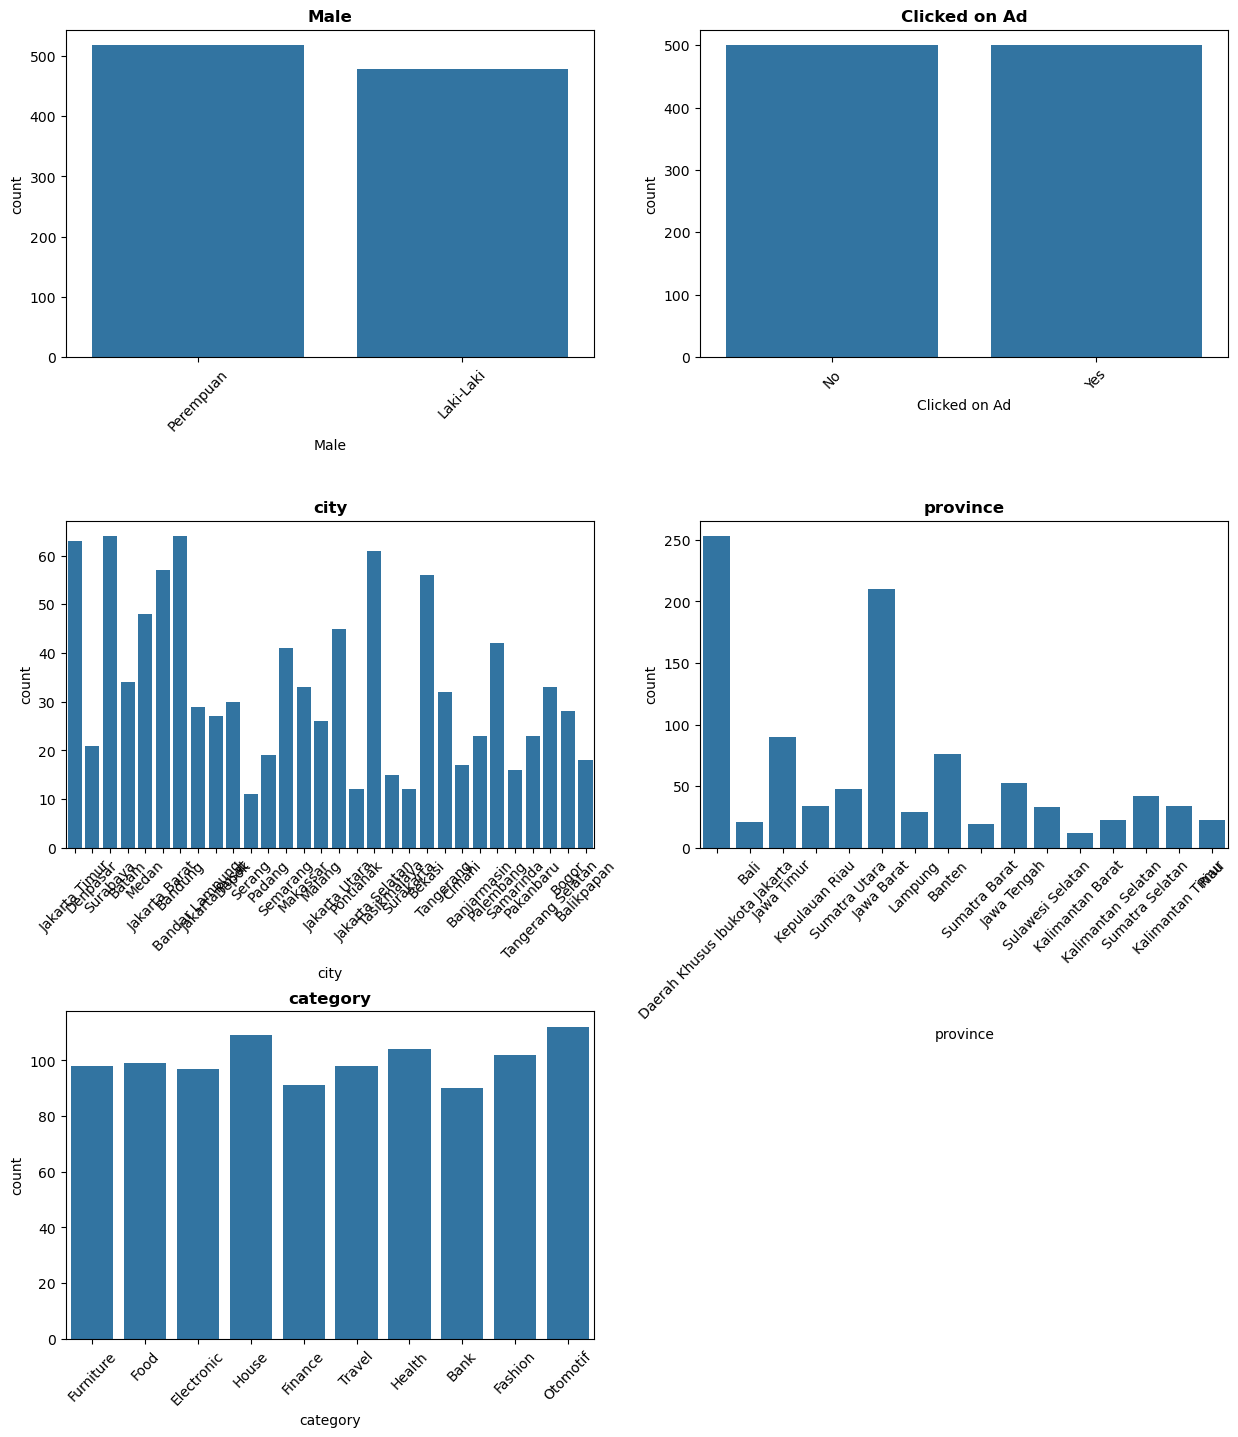

In [9]:
plt.figure(figsize=(15,17))
cat_columns_vis = cat_columns
cat_columns_vis.remove('Timestamp')

for vis_cat in range(0, len(cat_columns_vis)):
    plt.subplot(3,2, vis_cat+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(data=df, x=cat_columns_vis[vis_cat])
    plt.title(cat_columns_vis[vis_cat], weight='bold')
    plt.xticks(rotation=46)

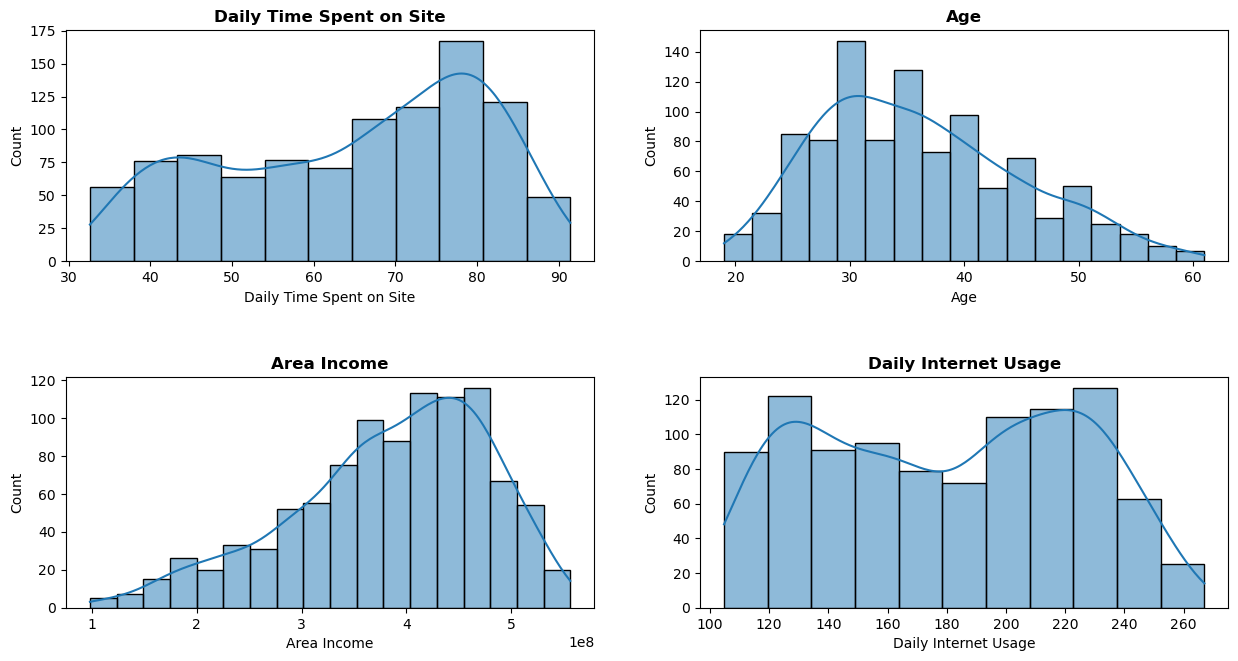

In [10]:
plt.figure(figsize=(15,12))

for vis_num in range(0, len(num_columns)):
    plt.subplot(3,2, vis_num+1)
    plt.subplots_adjust(hspace=0.5)
    sns.histplot(data=df, x=num_columns[vis_num], kde=True)
    plt.title(num_columns[vis_num], weight='bold')

#### Data Outlier

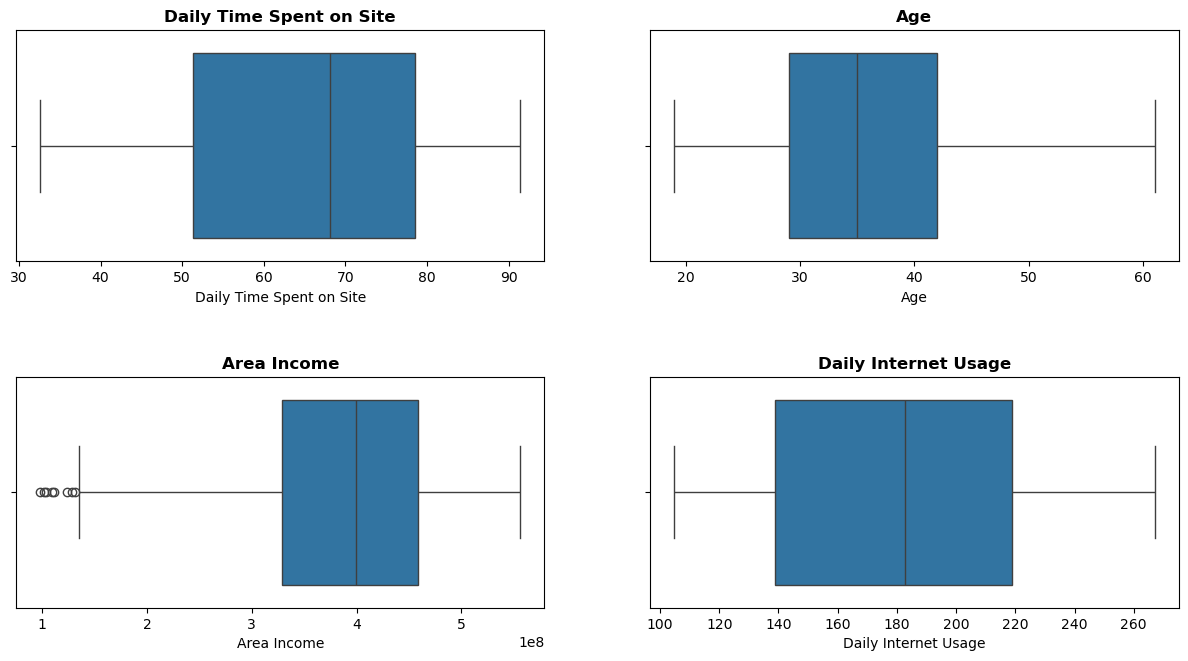

In [11]:
plt.figure(figsize=(15,12))

for vis_num in range(0, len(num_columns)):
    plt.subplot(3,2, vis_num+1)
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(data=df, x=num_columns[vis_num])
    plt.title(num_columns[vis_num], weight='bold')

Terdapat feature yang memiliki nilai outliers yang cukup banyak yakni feature **Area Income**, feature tersebut pada tahapan preprocessing data harus dilakukan handling.

**Tabel Hasil Univariate Analysis :**
|Feature|Hasil|Deskripsi|
|---|---|---|
|Male|- Memiliki proporsi data yang mendekati seimbang|- Jumlah customer yang dimiliki, memiliki proporsi jumlah yang hampir sama antara perempuan dan laki-laki.|
|Clicked on Ad|- Memiliki proporsi data yang seimbang|- Jumlah customer yang melakukan click pada Ads memiliki proporsi jumlah yang seimbang (sama).|
|City|- Memiliki komposisi unique value|- Demografi city pada customer cukup beragam dan tersebar diberbagai kota di indonesia.|
|province|- Memiliki komposisi unique value| - Demografi province customer cukup beragam dan tersebar diberbagai provinsi di indonesia.|
|category|- Memiliki proporsi data yang hampir seimbang|- Jumlah customer antar kategori memiliki persebaran yang cukup seimbang.|
|Daily Time Spent on Site|- Memiliki distribusi bimodal|- Customer memiliki karakteristik (2 kelompok) berdasarkan lama menggunakan aplikasi|
|Age|- Distribusi Skewness Positif|- Pada kolom Age memiliki data yang terdistribusi Skewness Positif, dimana customer cenderung memiliki umur yang tergolong muda.|
|Area Income|- Distribusi Skewness Negatif|- Pada kolom ini data terdistribusi Skewness Negatif, dimana customer cenderung memiliki Area income yang besar.|
|Daily Internet Usage|- Distribusi Bimodal|- Customer cenderung terbagi menjadi 2 kelompok berdasarkan lama Penggunaan internet harian.|
|Area Income|- Outlier |- Pada kolom Area Income terdapat cukup banyak outlier|
|Male|- Nama Kolom|- Memiliki nama kolom yang tidak sesuai yakni Male, yang seharusnya adalah Gender.|

## **Bivariate Analysis**

In [12]:
#Function for Show value in Plot
def show_value_plot(data):
    data = data
    for value_plot in data.patches:
        data.annotate(format_value(value_plot.get_height()), 
                      (value_plot.get_x() + value_plot.get_width()/2., value_plot.get_height()),
                      va='center', ha='center',
                      xytext=(0,10),
                      textcoords='offset points')

#Function Change Format Value
def format_value(data):
    return "{:.2f}%".format(data)

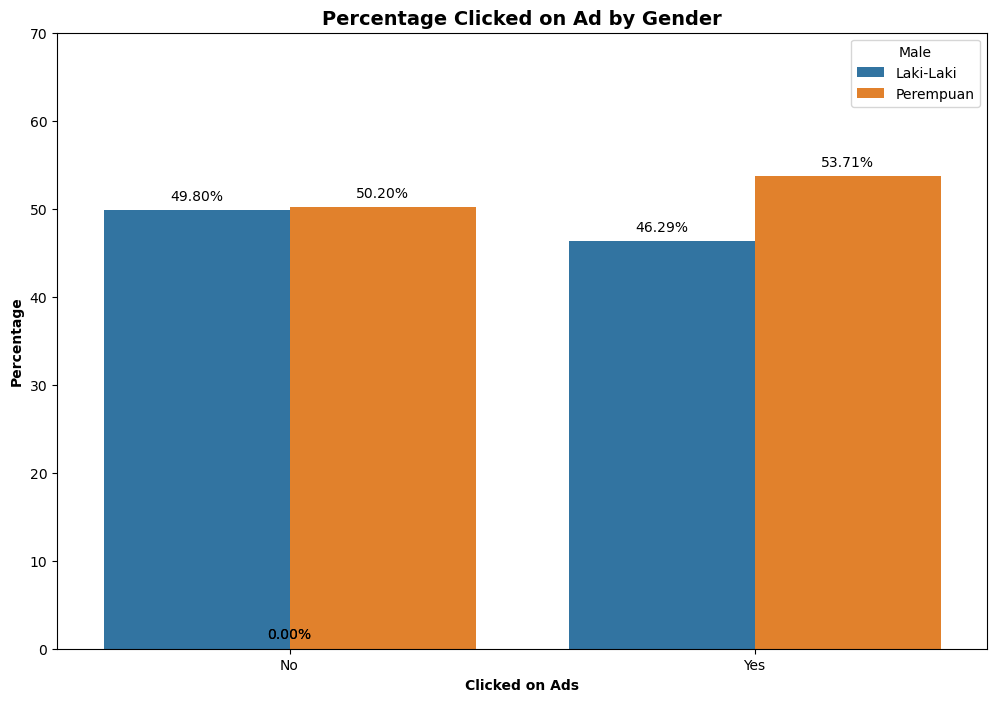

In [13]:
#Visualization Percentage Customer Clicked on Ad by Gender
cat_male = df.groupby('Male')['Clicked on Ad'].value_counts().reset_index(name='sum')
cat_male['Total'] = cat_male.groupby('Clicked on Ad')['sum'].transform(sum)
cat_male['Percentage'] = round(((cat_male['sum']/cat_male['Total'])*100), 2)

plt.figure(figsize=(12,8))
vis = sns.barplot(data=cat_male, x='Clicked on Ad', hue='Male', y='Percentage')
plt.ylim(0, 70)
plt.title("Percentage Clicked on Ad by Gender", weight='bold', fontsize=14)
plt.xlabel("Clicked on Ads", weight='bold')
plt.ylabel("Percentage", weight='bold')

show_value_plot(vis)
plt.show()

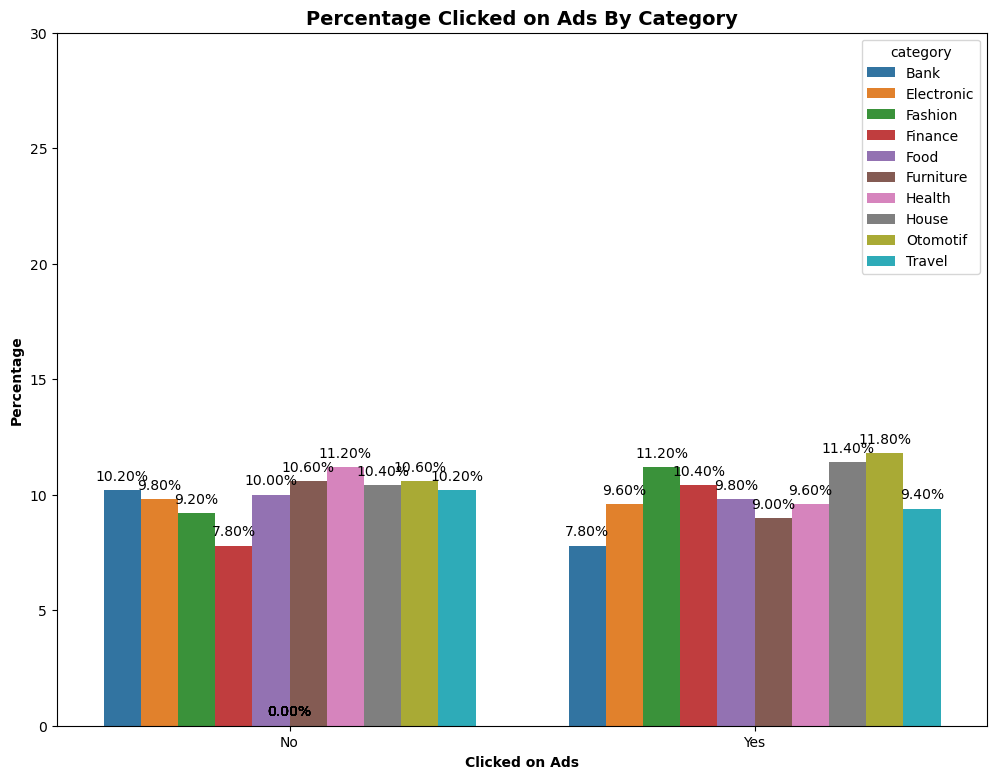

In [14]:
#Visualization Percentage Customer Clicked on Ads By Category
cat_catry = df.groupby('category')['Clicked on Ad'].value_counts().reset_index(name='sum')
cat_catry['Total'] = cat_catry.groupby('Clicked on Ad')['sum'].transform(sum)
cat_catry['Percentage'] = round(((cat_catry['sum']/cat_catry['Total'])*100),2)

plt.figure(figsize=(12,9))
vis = sns.barplot(data=cat_catry, x='Clicked on Ad', hue='category', y='Percentage')
plt.ylim(0, 30)
plt.title("Percentage Clicked on Ads By Category", weight='bold', fontsize=14)
plt.xlabel("Clicked on Ads", weight='bold')
plt.ylabel("Percentage", weight='bold')

show_value_plot(vis)
plt.show()

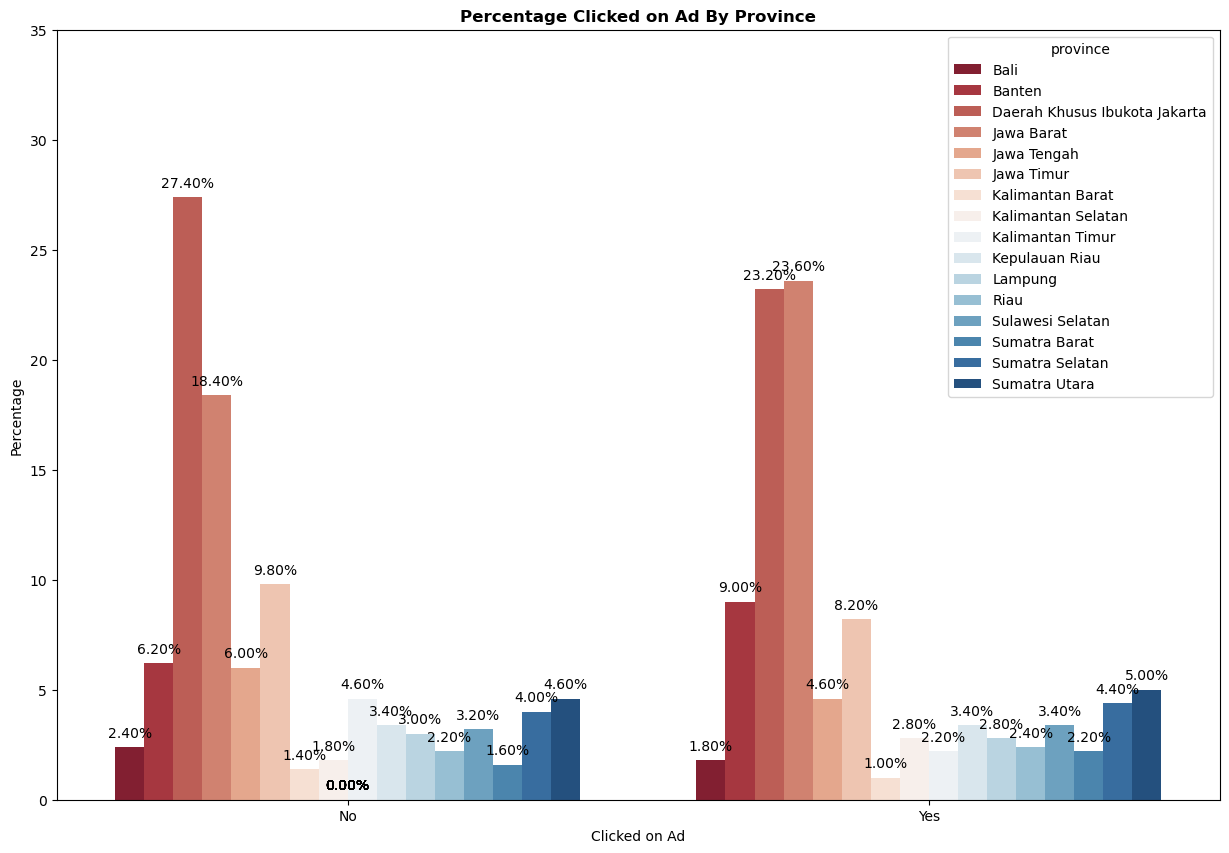

In [15]:
#Visualization Percentage Customer Clicked on Ad By Province
cat_provin = df.groupby('province')['Clicked on Ad'].value_counts().reset_index(name='sum')
cat_provin['Total'] = cat_provin.groupby('Clicked on Ad')['sum'].transform(sum)
cat_provin['Percentage'] = round(((cat_provin['sum']/cat_provin['Total'])*100), 2)

plt.figure(figsize=(15,10))
vis = sns.barplot(data=cat_provin, x='Clicked on Ad', hue='province', y='Percentage', palette='RdBu')
plt.ylim(0, 35)
plt.title("Percentage Clicked on Ad By Province", weight='bold')

show_value_plot(vis)
plt.show()

##### Age Group

In [16]:
#Make New Feature Age Group
age_group = []

for val_age in df['Age']:
    if val_age < 20:
        val = "<20"
    elif val_age >= 20 and val_age <= 30:
        val ="20 - 30"
    elif val_age > 30 and val_age <= 40 :
        val = "30 - 40"
    elif val_age > 40 and val_age <= 50 :
        val = "40 - 50"
    else :
        val = ">50"
    
    age_group.append(val)

df['Age_Group'] = age_group

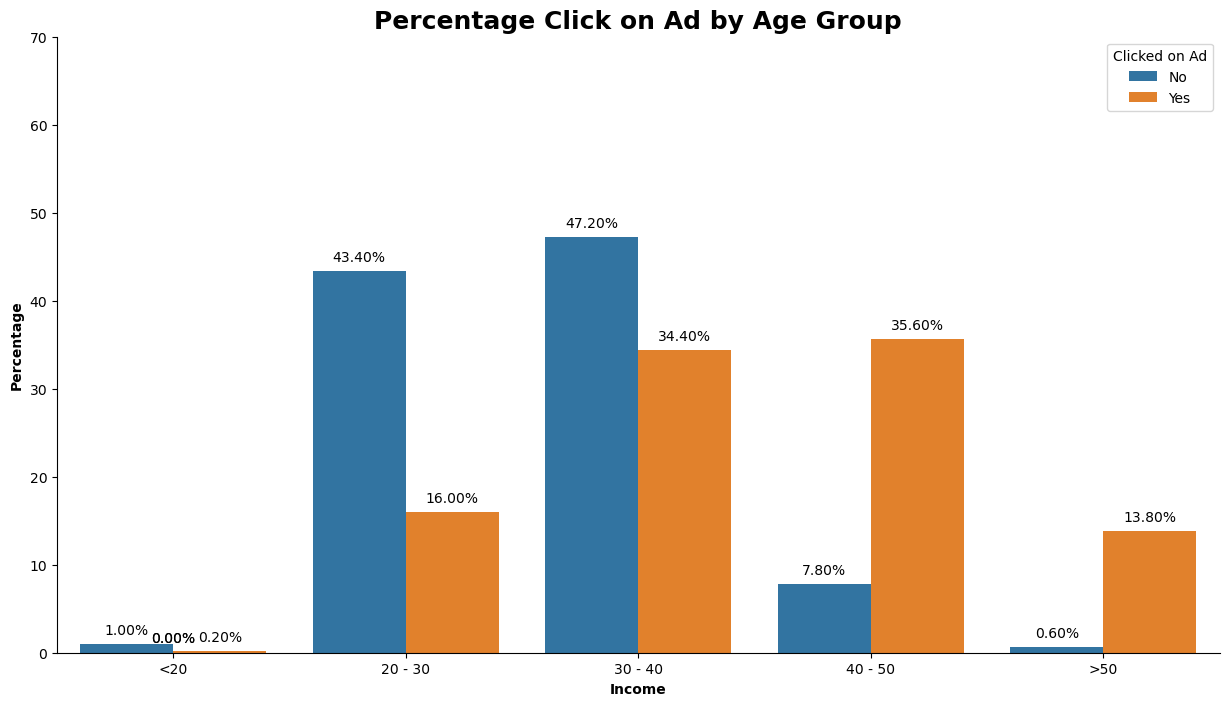

In [17]:
#Visualization Percentage Age Group
scatter_age = df.groupby('Age_Group')['Clicked on Ad'].value_counts().reset_index(name='sum')
scatter_age['Total'] = scatter_age.groupby('Clicked on Ad')['sum'].transform(sum)
scatter_age['Percentage'] = round(((scatter_age['sum']/scatter_age['Total'])*100), 2)

plt.figure(figsize=(15,8))
order = ["<20", "20 - 30", "30 - 40", "40 - 50", ">50"]

vis = sns.barplot(data=scatter_age, x='Age_Group', y='Percentage', hue='Clicked on Ad', order=order)
sns.despine()
plt.title("Percentage Click on Ad by Age Group", weight='bold', fontsize=18)
plt.xlabel("Income", weight='bold')
plt.ylabel("Percentage", weight='bold')
plt.ylim(0,70)

show_value_plot(vis)
plt.show()

In [18]:
#Make Income Group Feature
income = []

for val_income in df['Area Income']:
    if val_income < 100000000:
        val = "< 1 Jt"
    elif val_income >=100000000 and val_income < 200000000:
        val = "1 Jt"
    elif val_income >=200000000 and val_income < 300000000:
        val = "2 Jt"
    elif val_income >=300000000 and val_income <400000000:
        val = "3 Jt"
    elif val_income >=400000000 and val_income <500000000:
        val = "4 Jt"
    else :
        val = "5 Jt"
    income.append(val)

df['Income'] = income

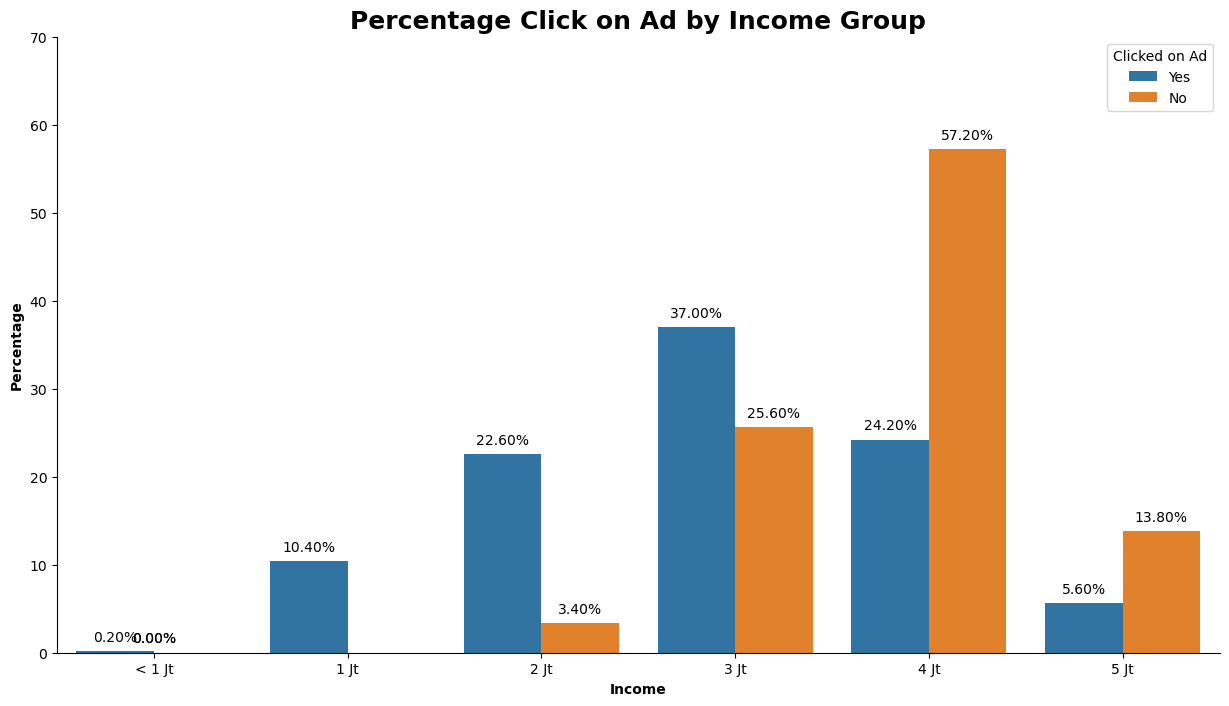

In [19]:
#Visualization Percentage Income Group
scatter_income = df.groupby('Income')['Clicked on Ad'].value_counts().reset_index(name='sum')
scatter_income['Total'] = scatter_income.groupby('Clicked on Ad')['sum'].transform(sum)
scatter_income['Percentage'] = round(((scatter_income['sum']/scatter_income['Total'])*100), 2)

plt.figure(figsize=(15,8))
order = ['< 1 Jt', '1 Jt', '2 Jt', '3 Jt', '4 Jt', '5 Jt']

vis = sns.barplot(data=scatter_income, x='Income', y='Percentage', hue='Clicked on Ad', order=order)
sns.despine()
plt.title("Percentage Click on Ad by Income Group", weight='bold', fontsize=18)
plt.xlabel("Income", weight='bold')
plt.ylabel("Percentage", weight='bold')
plt.ylim(0,70)

show_value_plot(vis)
plt.show()

In [20]:
#Make Time Spent on Site Group Feature
time_site = []

for val_site in df['Daily Time Spent on Site']:
    if val_site < 30:
        val = "< 30m"
    elif val_site >= 30 and val_site < 60:
        val = "30m - 60m"
    elif val_site >= 60 and val_site <= 90:
        val = "60m - 90m"
    else :
        val = "> 90m"
    time_site.append(val)

df['Time_Site'] = time_site

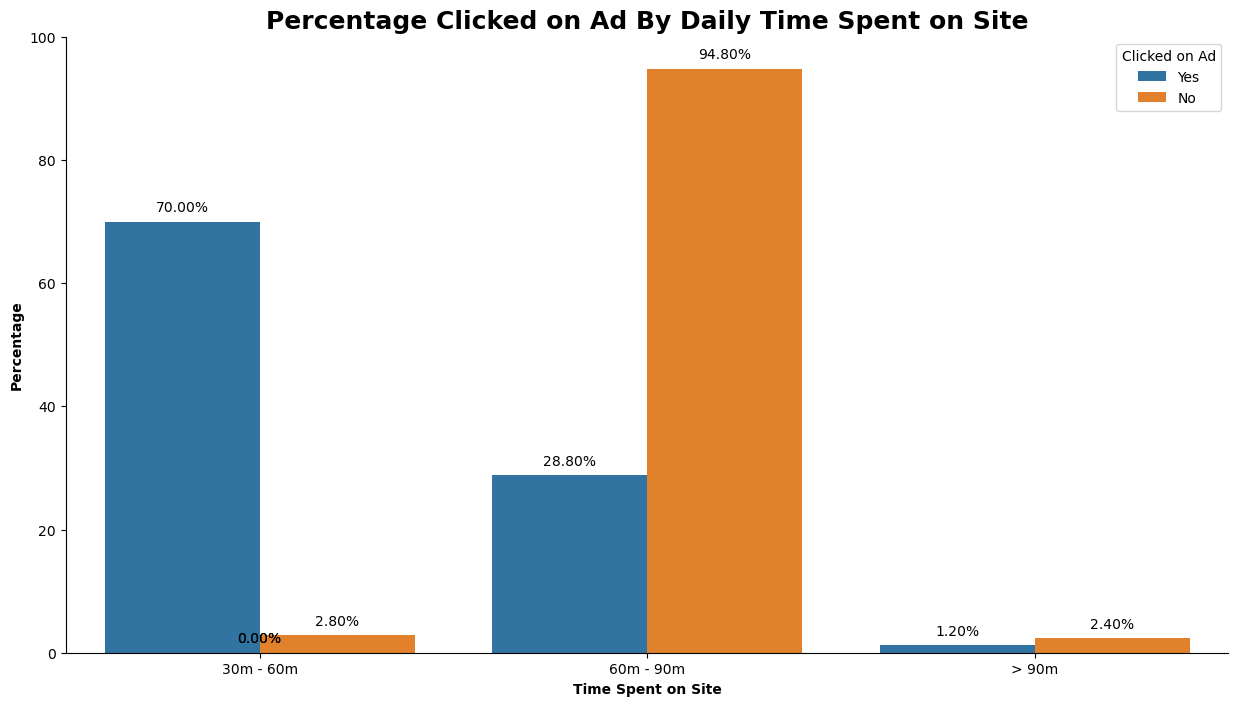

In [21]:
#Visualization Percentage Clicked on Ad By Daily Time Spent on Site
scatter_daily_site = df.groupby('Time_Site')['Clicked on Ad'].value_counts().reset_index(name='sum')
scatter_daily_site['Total'] = scatter_daily_site.groupby('Clicked on Ad')['sum'].transform(sum)
scatter_daily_site['Percentage'] = round(((scatter_daily_site['sum']/scatter_daily_site['Total'])*100), 2)

plt.figure(figsize=(15,8))
order = ['30m - 60m', '60m - 90m', '> 90m']

vis = sns.barplot(data=scatter_daily_site, x='Time_Site', y='Percentage', hue='Clicked on Ad', order=order)
sns.despine()
plt.title("Percentage Clicked on Ad By Daily Time Spent on Site", weight='bold', fontsize=18)
plt.xlabel("Time Spent on Site", weight='bold')
plt.ylabel("Percentage", weight='bold')
plt.ylim(0,100)

show_value_plot(vis)

plt.show()

In [22]:
#Make Time Internet Usage Group Feature
time_internet = []

for val_internet in df['Daily Internet Usage']:
    if val_internet >= 100 and val_internet < 120:
        val = "1,5 - 2 JAM"
    elif val_internet >= 120 and val_internet < 180:
        val = "2 - 3 JAM"
    elif val_internet >= 180 and val_internet < 240:
        val = "3 - 4 JAM"
    else : 
        val = "> 4 JAM"
    time_internet.append(val)

df['Time_Internet'] = time_internet

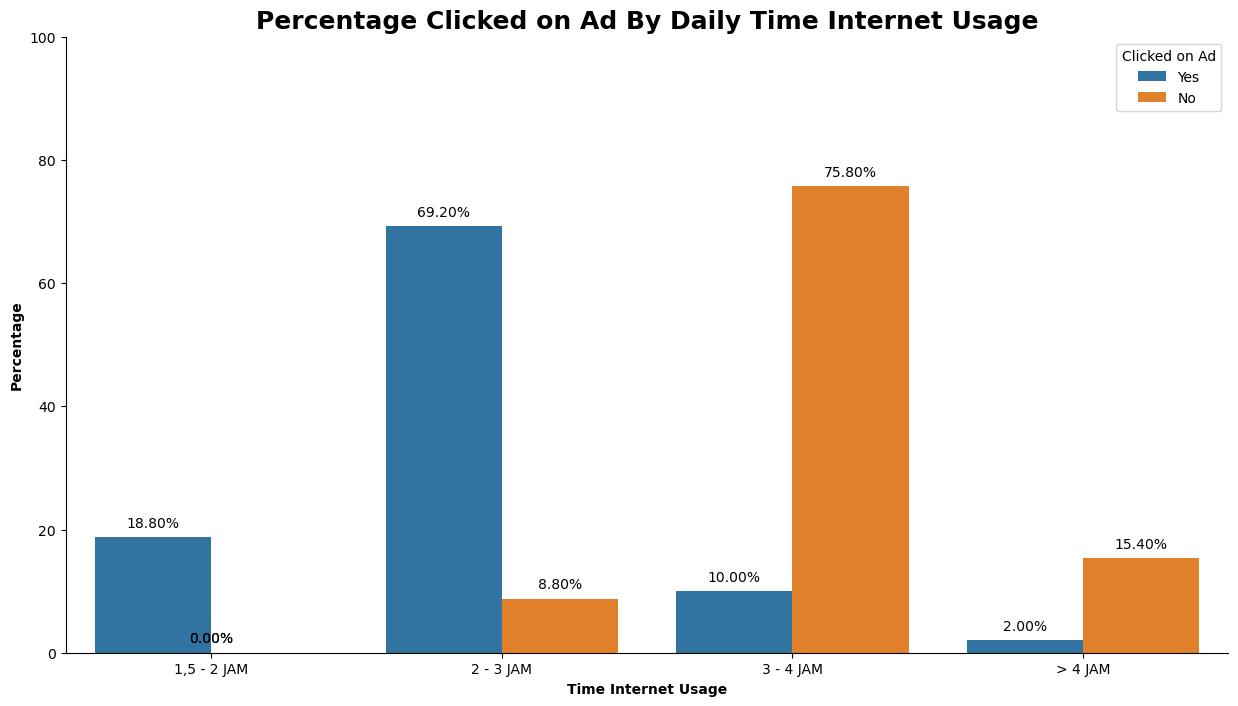

In [23]:
#Visualization Percentage Clicked on Ad By Daily Time Internet Usage
scatter_daily_site = df.groupby('Time_Internet')['Clicked on Ad'].value_counts().reset_index(name='sum')
scatter_daily_site['Total'] = scatter_daily_site.groupby('Clicked on Ad')['sum'].transform(sum)
scatter_daily_site['Percentage'] = round(((scatter_daily_site['sum']/scatter_daily_site['Total'])*100), 2)

plt.figure(figsize=(15,8))
order = ['1,5 - 2 JAM', '2 - 3 JAM', '3 - 4 JAM', '> 4 JAM']

vis = sns.barplot(data=scatter_daily_site, x='Time_Internet', y='Percentage', hue='Clicked on Ad', order=order)
sns.despine()
plt.title("Percentage Clicked on Ad By Daily Time Internet Usage", weight='bold', fontsize=18)
plt.xlabel("Time Internet Usage", weight='bold')
plt.ylabel("Percentage", weight='bold')
plt.ylim(0,100)

show_value_plot(vis)

plt.show()

## **Multivariate Analysis**

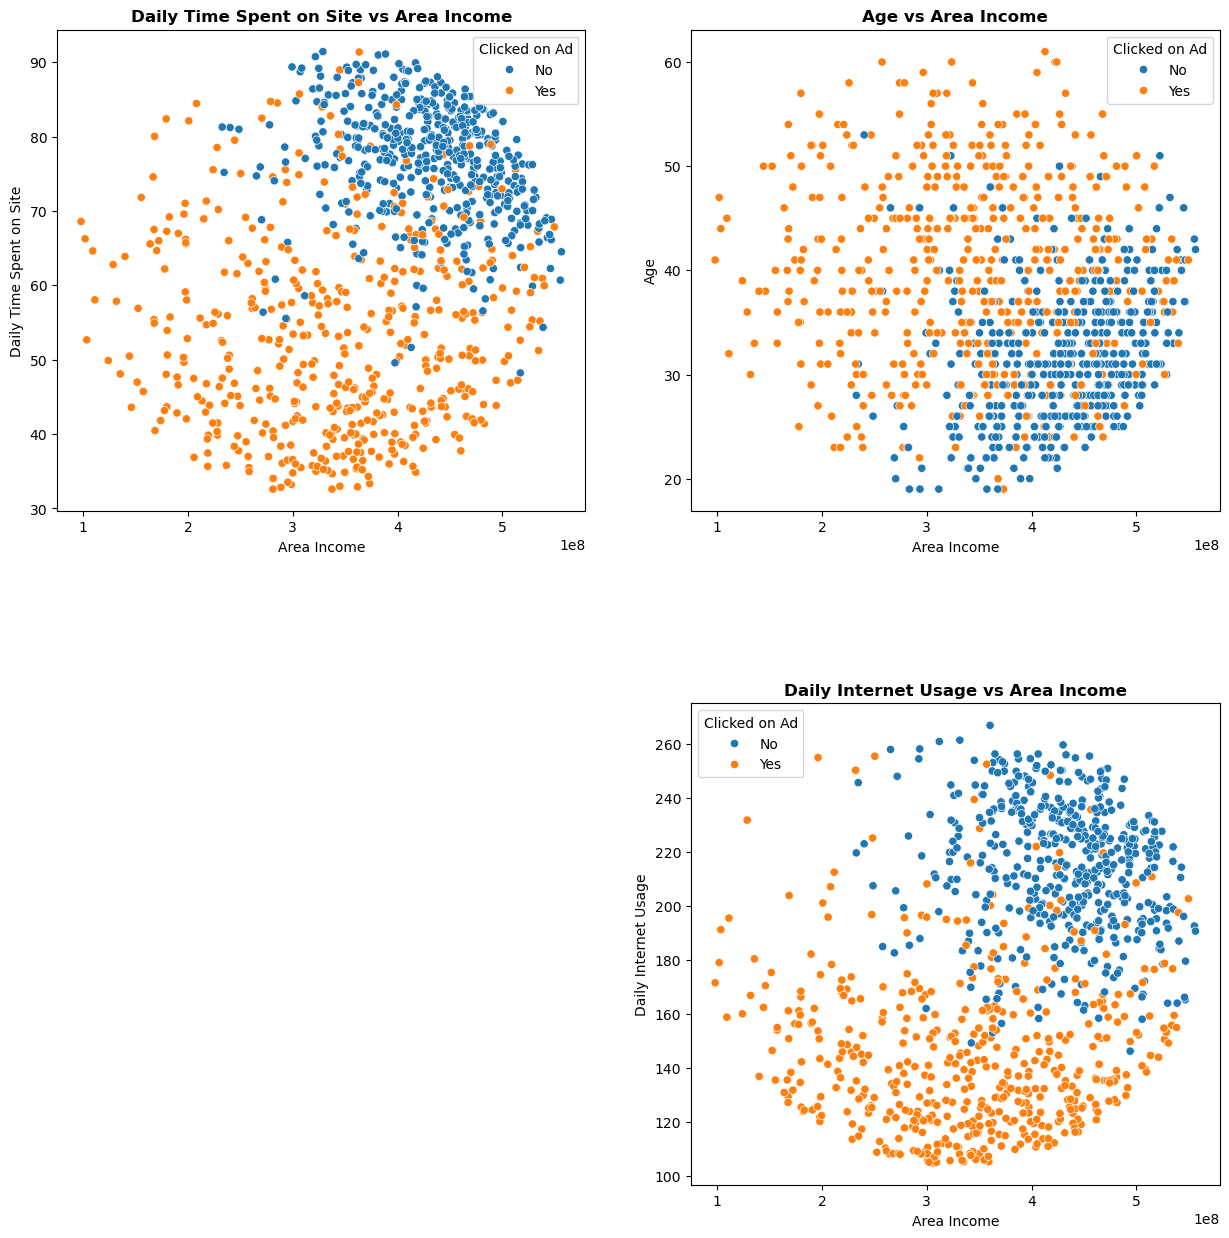

In [24]:
num_columns.append('Clicked on Ad')

plt.figure(figsize=(15,15))
for vis_scatter in range(0, len(num_columns)):
    if num_columns[vis_scatter] != 'Area Income' and num_columns[vis_scatter] != 'Clicked on Ad':
        plt.subplot(2,2, vis_scatter+1)
        plt.subplots_adjust(hspace=0.4)
        sns.scatterplot(data=df, x='Area Income', y=num_columns[vis_scatter], hue='Clicked on Ad')
        plt.title(f"{num_columns[vis_scatter]} vs Area Income", weight='bold')

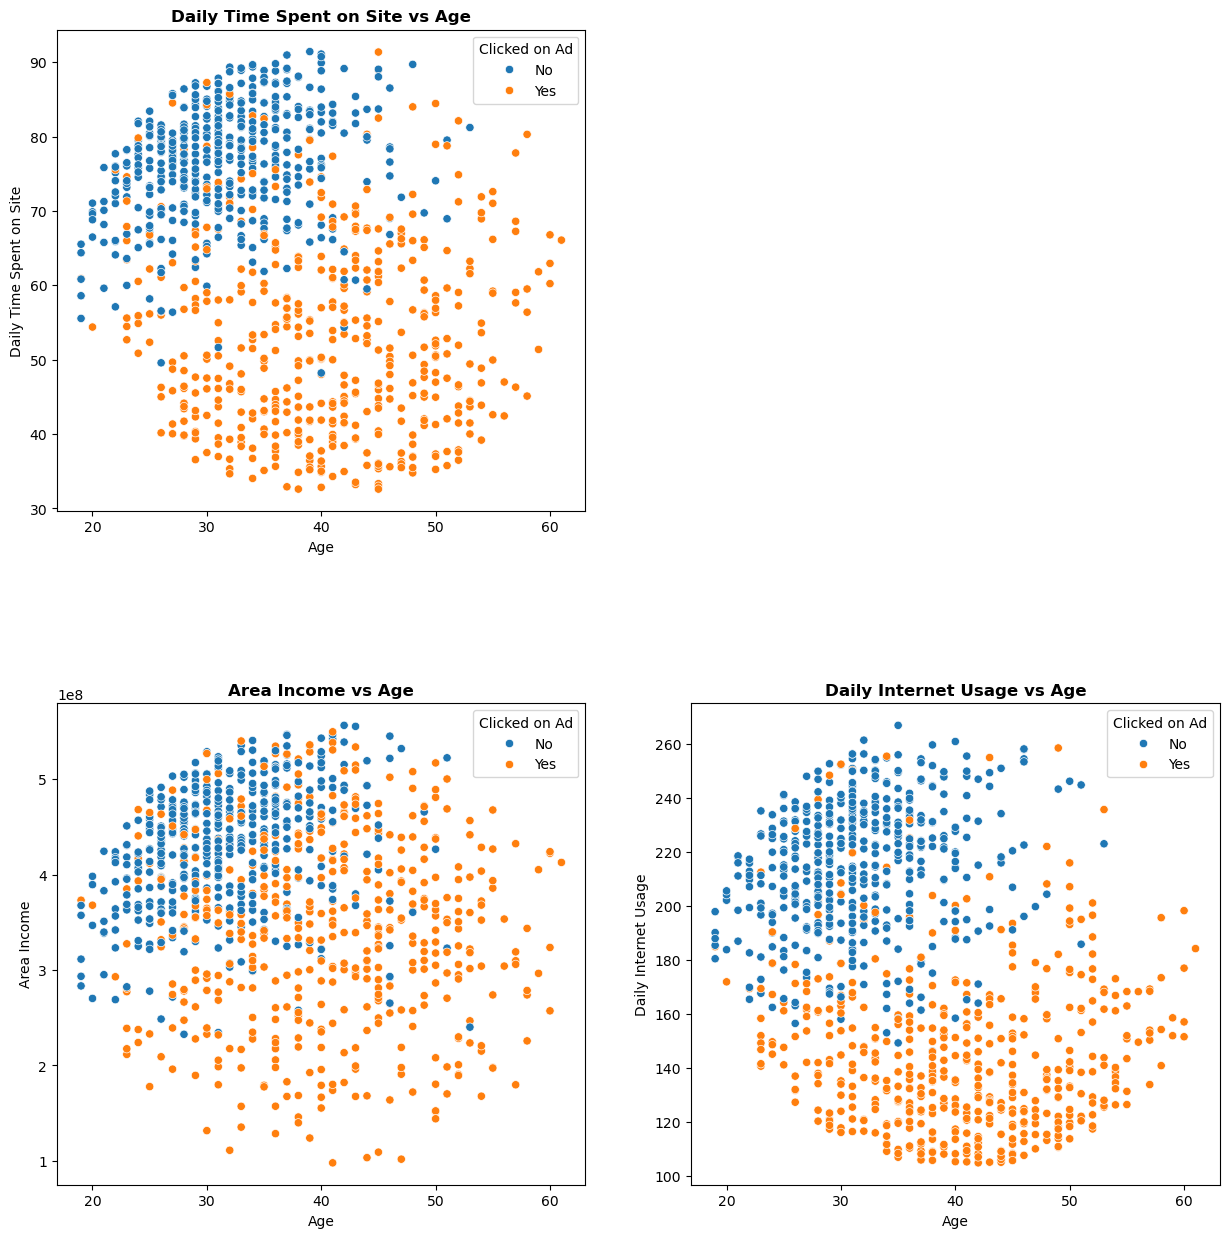

In [25]:
num_columns.append('Clicked on Ad')

plt.figure(figsize=(15,15))
for vis_scatter in range(0, len(num_columns)):
    if num_columns[vis_scatter] != 'Age' and num_columns[vis_scatter] != 'Clicked on Ad':
        plt.subplot(2,2, vis_scatter+1)
        plt.subplots_adjust(hspace=0.4)
        sns.scatterplot(data=df, x='Age', y=num_columns[vis_scatter], hue='Clicked on Ad')
        plt.title(f"{num_columns[vis_scatter]} vs Age", weight='bold')

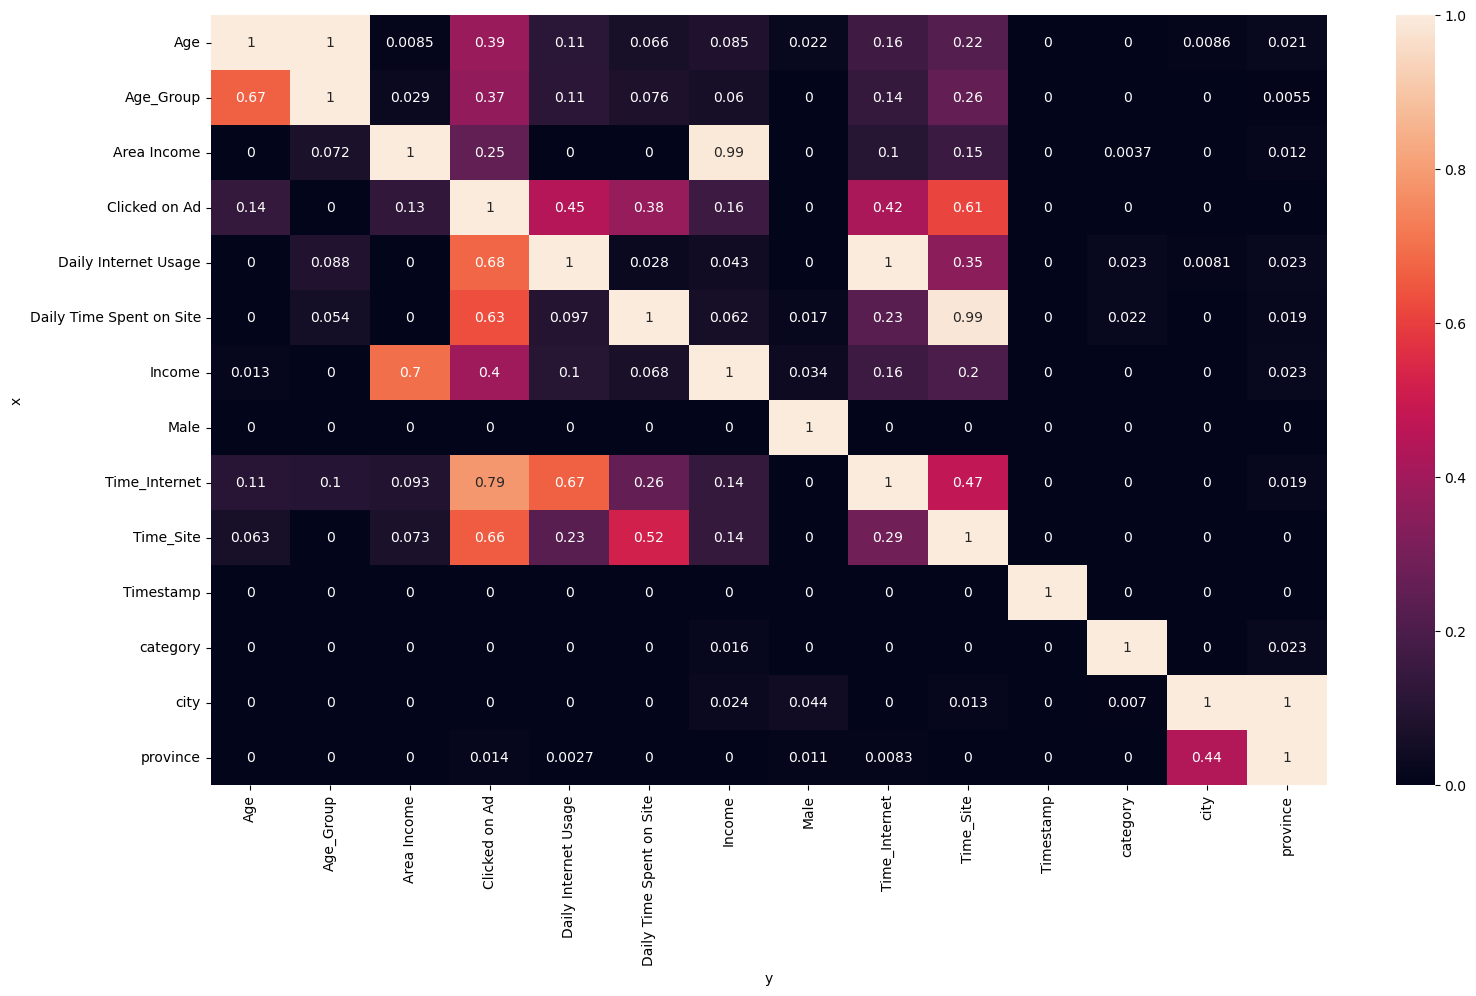

In [26]:
#Calculate PPS (Predictive Power Score) and Visualization Result PPS
plt.figure(figsize=(18,10))
pps = ppscore.matrix(df)
pps_table = pps.pivot_table(index='x', columns='y', values='ppscore')
sns.heatmap(pps_table, annot=True)

plt.show()

Multivariate Analysis ini menggunakan PPS (Predictive Power Score), teknik ini digunakan karena dapat memproses fitur yang memiliki data bertipe numerical dan categorical secara bersamaan. selain itu teknik ini bekerja lebih baik dari pada teknik corellation sederhana seperti pearson, dimana teknik ini dapat mengatasi hubungan non-linear atau relasi yang tidak linear antara feature dan target.

Terdapat beberapa fitur yang memiliki nilai korelasi cukup kuat terhadap feature target (Clicked on Ad), feature tersebut adalah : 
1. Daily Internet Usage
2. Daily Time Spent on Site
3. Area Income 
4. Age

Terdapat feature lain yang juga memiliki korelasi cukup kuat, tetapi feature tersebut merupakan feature yang kami generate secara pribadi. maka feature - feature tersebut tidak kami gunakan.
1. Time_Internet
2. Time_Site
3. Income

## **Data Preprocesing**

#### Missing Value

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
 10  Age_Group                 1000 non-null   object 
 11  Income                    1000 non-null   object 
 12  Time_Site                 1000 non-null   object 
 13  Time_Internet             1000 non-null   object 
dtypes: float6

In [28]:
df = df[['Daily Internet Usage', 'Daily Time Spent on Site', 'Area Income', 'Age', 'Clicked on Ad']]

In [29]:
#Cek Missing Value
df_colomns = df.columns

for val_miss in range(0, len(df_colomns)):
    if df[df_colomns[val_miss]].isnull().sum() != 0:
        print(f"Kolom : {df_colomns[val_miss]}")
        print(f"Jumlah Missing Value : {df[df_colomns[val_miss]].isnull().sum()}")
        print(f"Persentase Missing Value : {round(((df[df_colomns[val_miss]].isnull().sum()/df.shape[0])*100), 2)}%")
        print("")

Kolom : Daily Internet Usage
Jumlah Missing Value : 11
Persentase Missing Value : 1.1%

Kolom : Daily Time Spent on Site
Jumlah Missing Value : 13
Persentase Missing Value : 1.3%

Kolom : Area Income
Jumlah Missing Value : 13
Persentase Missing Value : 1.3%



#### Duplicated Data

In [30]:
print(f"Jumlah Data Duplicated : {df.duplicated().sum()}")

Jumlah Data Duplicated : 0


#### Handling Missing Value

In [31]:
#Handling Feature that have Missing Value
df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].mode()[0], inplace=True)
df['Area Income'].fillna(df['Area Income'].median(), inplace=True)
df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mode()[0], inplace=True)

In [32]:
#Cek After Handling Missing Value
mis_cek = df.columns
for val_miss in range(0, len(mis_cek)):
    print(f"Kolom : {mis_cek[val_miss]}")
    print(f"Jumlah Missing Value : {df[mis_cek[val_miss]].isnull().sum()}")
    print(f"Persentase Missing Value : {round(((df[mis_cek[val_miss]].isnull().sum()/df.shape[0])*100), 2)}%")
    print("")

Kolom : Daily Internet Usage
Jumlah Missing Value : 0
Persentase Missing Value : 0.0%

Kolom : Daily Time Spent on Site
Jumlah Missing Value : 0
Persentase Missing Value : 0.0%

Kolom : Area Income
Jumlah Missing Value : 0
Persentase Missing Value : 0.0%

Kolom : Age
Jumlah Missing Value : 0
Persentase Missing Value : 0.0%

Kolom : Clicked on Ad
Jumlah Missing Value : 0
Persentase Missing Value : 0.0%



#### Handling Outlier

In [33]:
#Handling Outliers in Feature Area Income
outlier_lama = df['Area Income']

Q1 = df['Area Income'].quantile(0.25)
Q3 = df['Area Income'].quantile(0.75)
IQR = Q3 - Q1
lower_thres = Q1 - 1.5 * IQR
upper_thres = Q3 + 1.5 * IQR

df = df[(df['Area Income'] >= lower_thres) & (df['Area Income'] <= upper_thres)]

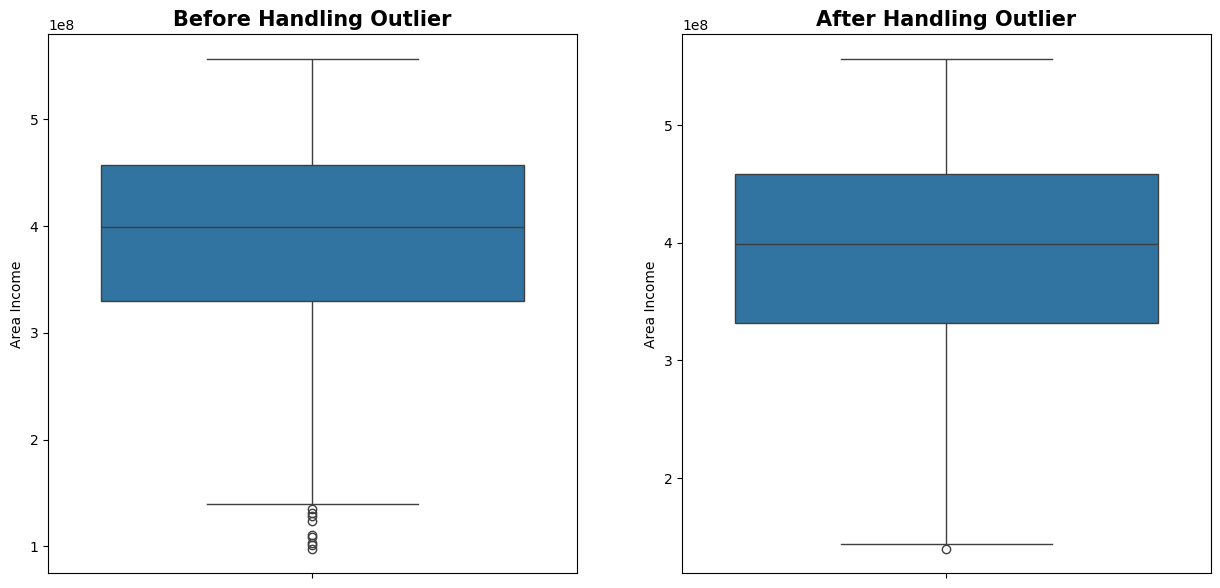

In [34]:
#Cek Outliers Before and After Handling
fig, axes = plt.subplots(1, 2, figsize=(15,7))

sns.boxplot(outlier_lama, ax=axes[0])
axes[0].set_title("Before Handling Outlier", weight='bold', fontsize=15)

sns.boxplot(df['Area Income'], ax=axes[1])
axes[1].set_title("After Handling Outlier", weight='bold', fontsize=15)

plt.show()

#### Handling Columns Name

In [35]:
#Rename Columns Target (Clicked on Ad)
df.rename(columns={'Clicked on Ad' : 'Label'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Internet Usage      991 non-null    float64
 1   Daily Time Spent on Site  991 non-null    float64
 2   Area Income               991 non-null    float64
 3   Age                       991 non-null    int64  
 4   Label                     991 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 46.5+ KB


#### Feature Encoding

In [36]:
#Feature Encoding With label Encoder
df['Label'] = df['Label'].replace({'No' : 0,
                                   'Yes' : 1})

df.head()

,Daily Internet Usage,Daily Time Spent on Site,Area Income,Age,Label
0,256.09,68.95,432837300.0,35,0
1,193.77,80.23,479092950.0,31,0
2,236.50,69.47,418501580.0,26,0
3,245.89,74.15,383643260.0,29,0
4,225.58,68.37,517229930.0,35,0


#### Train Test Split

In [38]:
from sklearn.model_selection import train_test_split

#Split Feature and Target
x = df.drop(columns='Label')
y = df['Label']

#Split Data to Data Train and Data Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
#Cek Shape Data Train and Data Test
print(f"Shape x_train {x_train.shape}")
print(f"Shape x_test {x_test.shape}")
print(f"Shape y_train {y_train.shape}")
print(f"Shape y_test {y_test.shape}")

Shape x_train (792, 4)
Shape x_test (199, 4)
Shape y_train (792,)
Shape y_test (199,)


## Modeling With No Normalization Data 

In [40]:
#Define Model (Algorithms Machine Learning)
models = [
    ("Logistic Regression", LogisticRegression()),
    ("SVM", SVC()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("Xgboost", XGBClassifier())
]

In [41]:
#Function Evaluation Model with Sklearn Metric
def evaluation_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

#Function Evaluation Model with Confusion Matrix
def evaluation_cm(model, x_test, y_test):
    """ model : name model, x_test : data testing (feature), y_test :  data testing (target)
        return TP, FN, FP, TN
        TP : True Positif, FN : False Negative, FP : False Positif, TN : True Negative
    """
    y_pred_cm = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred_cm)
    TP, FN, FP, TN = cm.ravel() 
    return TP, FN, FP, TN

In [42]:
#Training data with Model (Algorithms Machine Learning)
result = []

for nama, model in models:
    model.fit(x_train, y_train)
    accuracy_train, precision_train, recall_train, f1_train = evaluation_model(model, x_train, y_train)
    accuracy_test, precision_test, recall_test, f1_test = evaluation_model(model, x_test, y_test)
    result.append([nama, accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, f1_train, f1_test])

In [43]:
#Make DataFrame Result Training
data_result = pd.DataFrame(result, columns=['Nama Model', 
                                            'Accuracy_Train', 
                                            'Accuracy_Test', 
                                            'Precission_Train', 
                                            'Precission_Test', 
                                            'Recall_Train',
                                            'Recall_Test',
                                            'F1_Score_Train',
                                            'F1_Score_Test'])
data_result

,Nama Model,Accuracy_Train,Accuracy_Test,Precission_Train,Precission_Test,Recall_Train,Recall_Test,F1_Score_Train,F1_Score_Test
0,Logistic Regression,0.501263,0.517588,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,SVM,0.723485,0.663317,0.799320,0.723077,0.594937,0.489583,0.682148,0.583851
2,Decision Tree,1.000000,0.939698,1.000000,0.946809,1.000000,0.927083,1.000000,0.936842
3,Random Forest,1.000000,0.969849,1.000000,0.968750,1.000000,0.968750,1.000000,0.968750
4,AdaBoost,0.983586,0.959799,0.992268,0.958333,0.974684,0.958333,0.983397,0.958333
5,Gradient Boosting,0.996212,0.954774,1.000000,0.939394,0.992405,0.968750,0.996188,0.953846
6,Xgboost,1.000000,0.969849,1.000000,0.968750,1.000000,0.968750,1.000000,0.968750


In [44]:
data_result[['Nama Model', 'F1_Score_Test']]

,Nama Model,F1_Score_Test
0,Logistic Regression,0.000000
1,SVM,0.583851
2,Decision Tree,0.936842
3,Random Forest,0.968750
4,AdaBoost,0.958333
5,Gradient Boosting,0.953846
6,Xgboost,0.968750


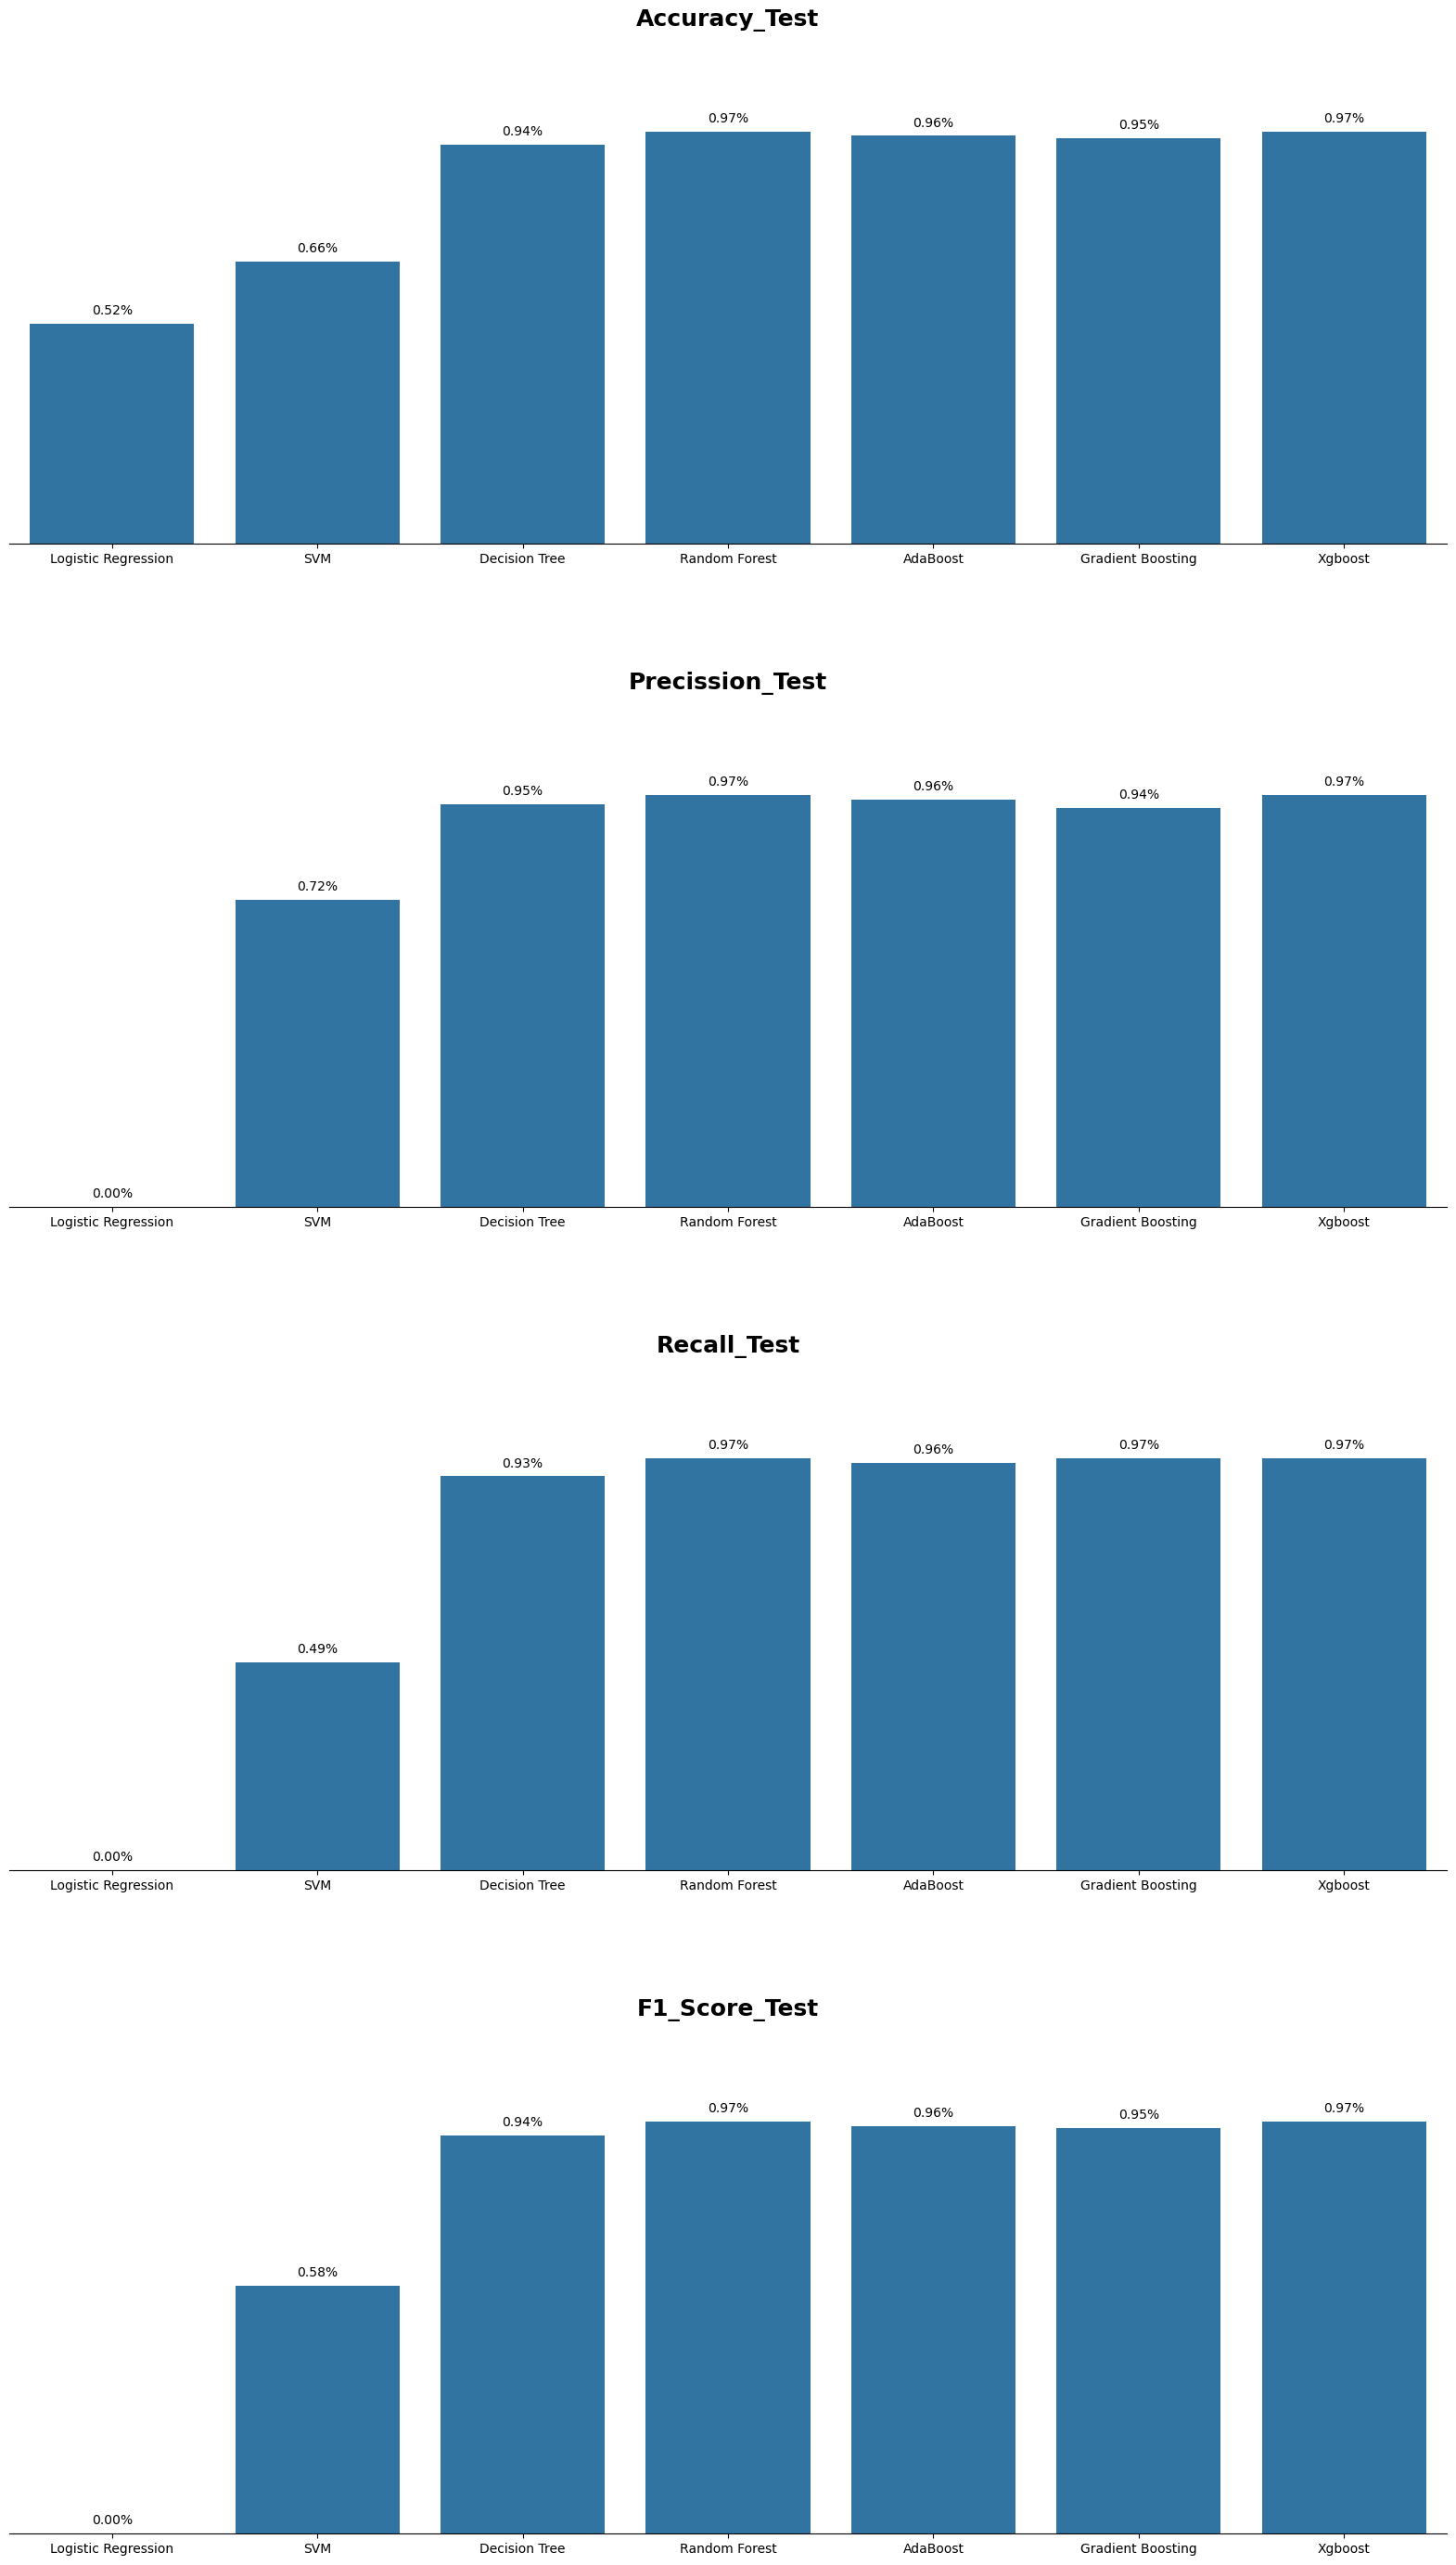

In [45]:
#Visualization DatFrame Training Result
data_result_vis = data_result[['Nama Model', 'Accuracy_Test', 'Precission_Test', 'Recall_Test', 'F1_Score_Test']]
data_result_columns = data_result_vis.drop(columns=['Nama Model']).columns

plt.figure(figsize=(20,35))
for vis_result in range(0, len(data_result_columns)):
    plt.subplot(4, 1, vis_result+1)
    plt.grid(visible=False)
    plt.subplots_adjust(hspace=0.3)
    vis = sns.barplot(data=data_result_vis, x=data_result_vis.columns[0], y=data_result[data_result_columns[vis_result]])
    sns.despine(left=True)
    plt.title(data_result_columns[vis_result], weight='bold', fontsize=18)
    plt.xlabel("")
    plt.yticks([])
    plt.ylabel("")
    plt.ylim(0, 1.2)
    show_value_plot(vis)

plt.show()

## Modeling With Normalization Data

In [46]:
from sklearn.preprocessing import MinMaxScaler

x_train_norm = x_train
x_test_norm = x_test

#Normalization X_train
x_train_norm['Daily Time Spent on Site'] = MinMaxScaler().fit_transform(x_train_norm['Daily Time Spent on Site'].values.reshape(len(x_train_norm), 1))
x_train_norm['Age'] = MinMaxScaler().fit_transform(x_train_norm['Age'].values.reshape(len(x_train_norm), 1))
x_train_norm['Area Income'] = MinMaxScaler().fit_transform(x_train_norm['Area Income'].values.reshape(len(x_train_norm), 1))
x_train_norm['Daily Internet Usage'] = MinMaxScaler().fit_transform(x_train_norm['Daily Internet Usage'].values.reshape(len(x_train_norm), 1))

#Normalization X_test
x_test_norm['Daily Time Spent on Site'] = MinMaxScaler().fit_transform(x_test_norm['Daily Time Spent on Site'].values.reshape(len(x_test_norm), 1))
x_test_norm['Age'] = MinMaxScaler().fit_transform(x_test_norm['Age'].values.reshape(len(x_test_norm), 1))
x_test_norm['Area Income'] = MinMaxScaler().fit_transform(x_test_norm['Area Income'].values.reshape(len(x_test_norm), 1))
x_test_norm['Daily Internet Usage'] = MinMaxScaler().fit_transform(x_test_norm['Daily Internet Usage'].values.reshape(len(x_test_norm), 1))

In [47]:
x_train_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Internet Usage,792.0,0.473327,0.284037,0.0,0.208004,0.485167,0.727399,1.0
Daily Time Spent on Site,792.0,0.548246,0.268855,0.0,0.318885,0.601309,0.776135,1.0
Area Income,792.0,0.583115,0.219511,0.0,0.443029,0.616453,0.752818,1.0
Age,792.0,0.416082,0.218360,0.0,0.243902,0.390244,0.560976,1.0


In [48]:
#Train dataset with confusion matrix evaluation
result_norm_cm = []

for nama, model in models:
    model.fit(x_train_norm, y_train)
    TP_train, FN_train, FP_train, TN_train = evaluation_cm(model, x_train_norm, y_train)
    TP_test, FN_test, FP_test, TN_test = evaluation_cm(model, x_test_norm, y_test)
    Accuracy_train= (TP_train + TN_train)/(TP_train + FP_train + TN_train + FN_train)
    Recall_train = (TP_train)/(TP_train + FN_train)
    Precision_train = (TP_train)/(TP_train + FP_train)
    F1_Score_train = 2/((1/Recall_train) + (1/Precision_train))

    Accuracy_test = (TP_test + TN_test)/(TP_test + FP_test + TN_test + FN_test)
    Recall_test = (TP_test)/(TP_test + FN_test) 
    Precision_test = (TP_test)/(TP_test + FP_test)
    F1_Score_test = 2/((1/Recall_test) + (1/Precision_test))
    
    result_norm_cm.append([nama,
                           Accuracy_train,
                           Accuracy_test,
                           Precision_train,
                           Precision_test,
                           Recall_train,
                           Recall_test,
                           F1_Score_train,
                           F1_Score_test])

In [49]:
#Make Dataframe confusion matrix result
data_result_norm = pd.DataFrame(result_norm_cm, columns=['Nama Model',
                                                         'Accuracy_Train',
                                                         'Accuracy_Test',
                                                         'Precission_Train',
                                                         'Precission_Test',
                                                         'Recall_Train',
                                                         'Recall_Test',
                                                         'F1_Score_Train',
                                                         'F1_Score_Test'])
data_result_norm

,Nama Model,Accuracy_Train,Accuracy_Test,Precission_Train,Precission_Test,Recall_Train,Recall_Test,F1_Score_Train,F1_Score_Test
0,Logistic Regression,0.963384,0.964824,0.946602,0.961538,0.982368,0.970874,0.964153,0.966184
1,SVM,0.969697,0.964824,0.958231,0.961538,0.982368,0.970874,0.970149,0.966184
2,Decision Tree,1.000000,0.944724,1.000000,0.933962,1.000000,0.961165,1.000000,0.947368
3,Random Forest,1.000000,0.969849,1.000000,0.970874,1.000000,0.970874,1.000000,0.970874
4,AdaBoost,0.983586,0.969849,0.975248,0.980198,0.992443,0.961165,0.983770,0.970588
5,Gradient Boosting,0.996212,0.959799,0.992500,0.970297,1.000000,0.951456,0.996236,0.960784
6,Xgboost,1.000000,0.964824,1.000000,0.952830,1.000000,0.980583,1.000000,0.966507


In [50]:
data_result_norm[['Nama Model', 'F1_Score_Test']]

,Nama Model,F1_Score_Test
0,Logistic Regression,0.966184
1,SVM,0.966184
2,Decision Tree,0.947368
3,Random Forest,0.970874
4,AdaBoost,0.970588
5,Gradient Boosting,0.960784
6,Xgboost,0.966507


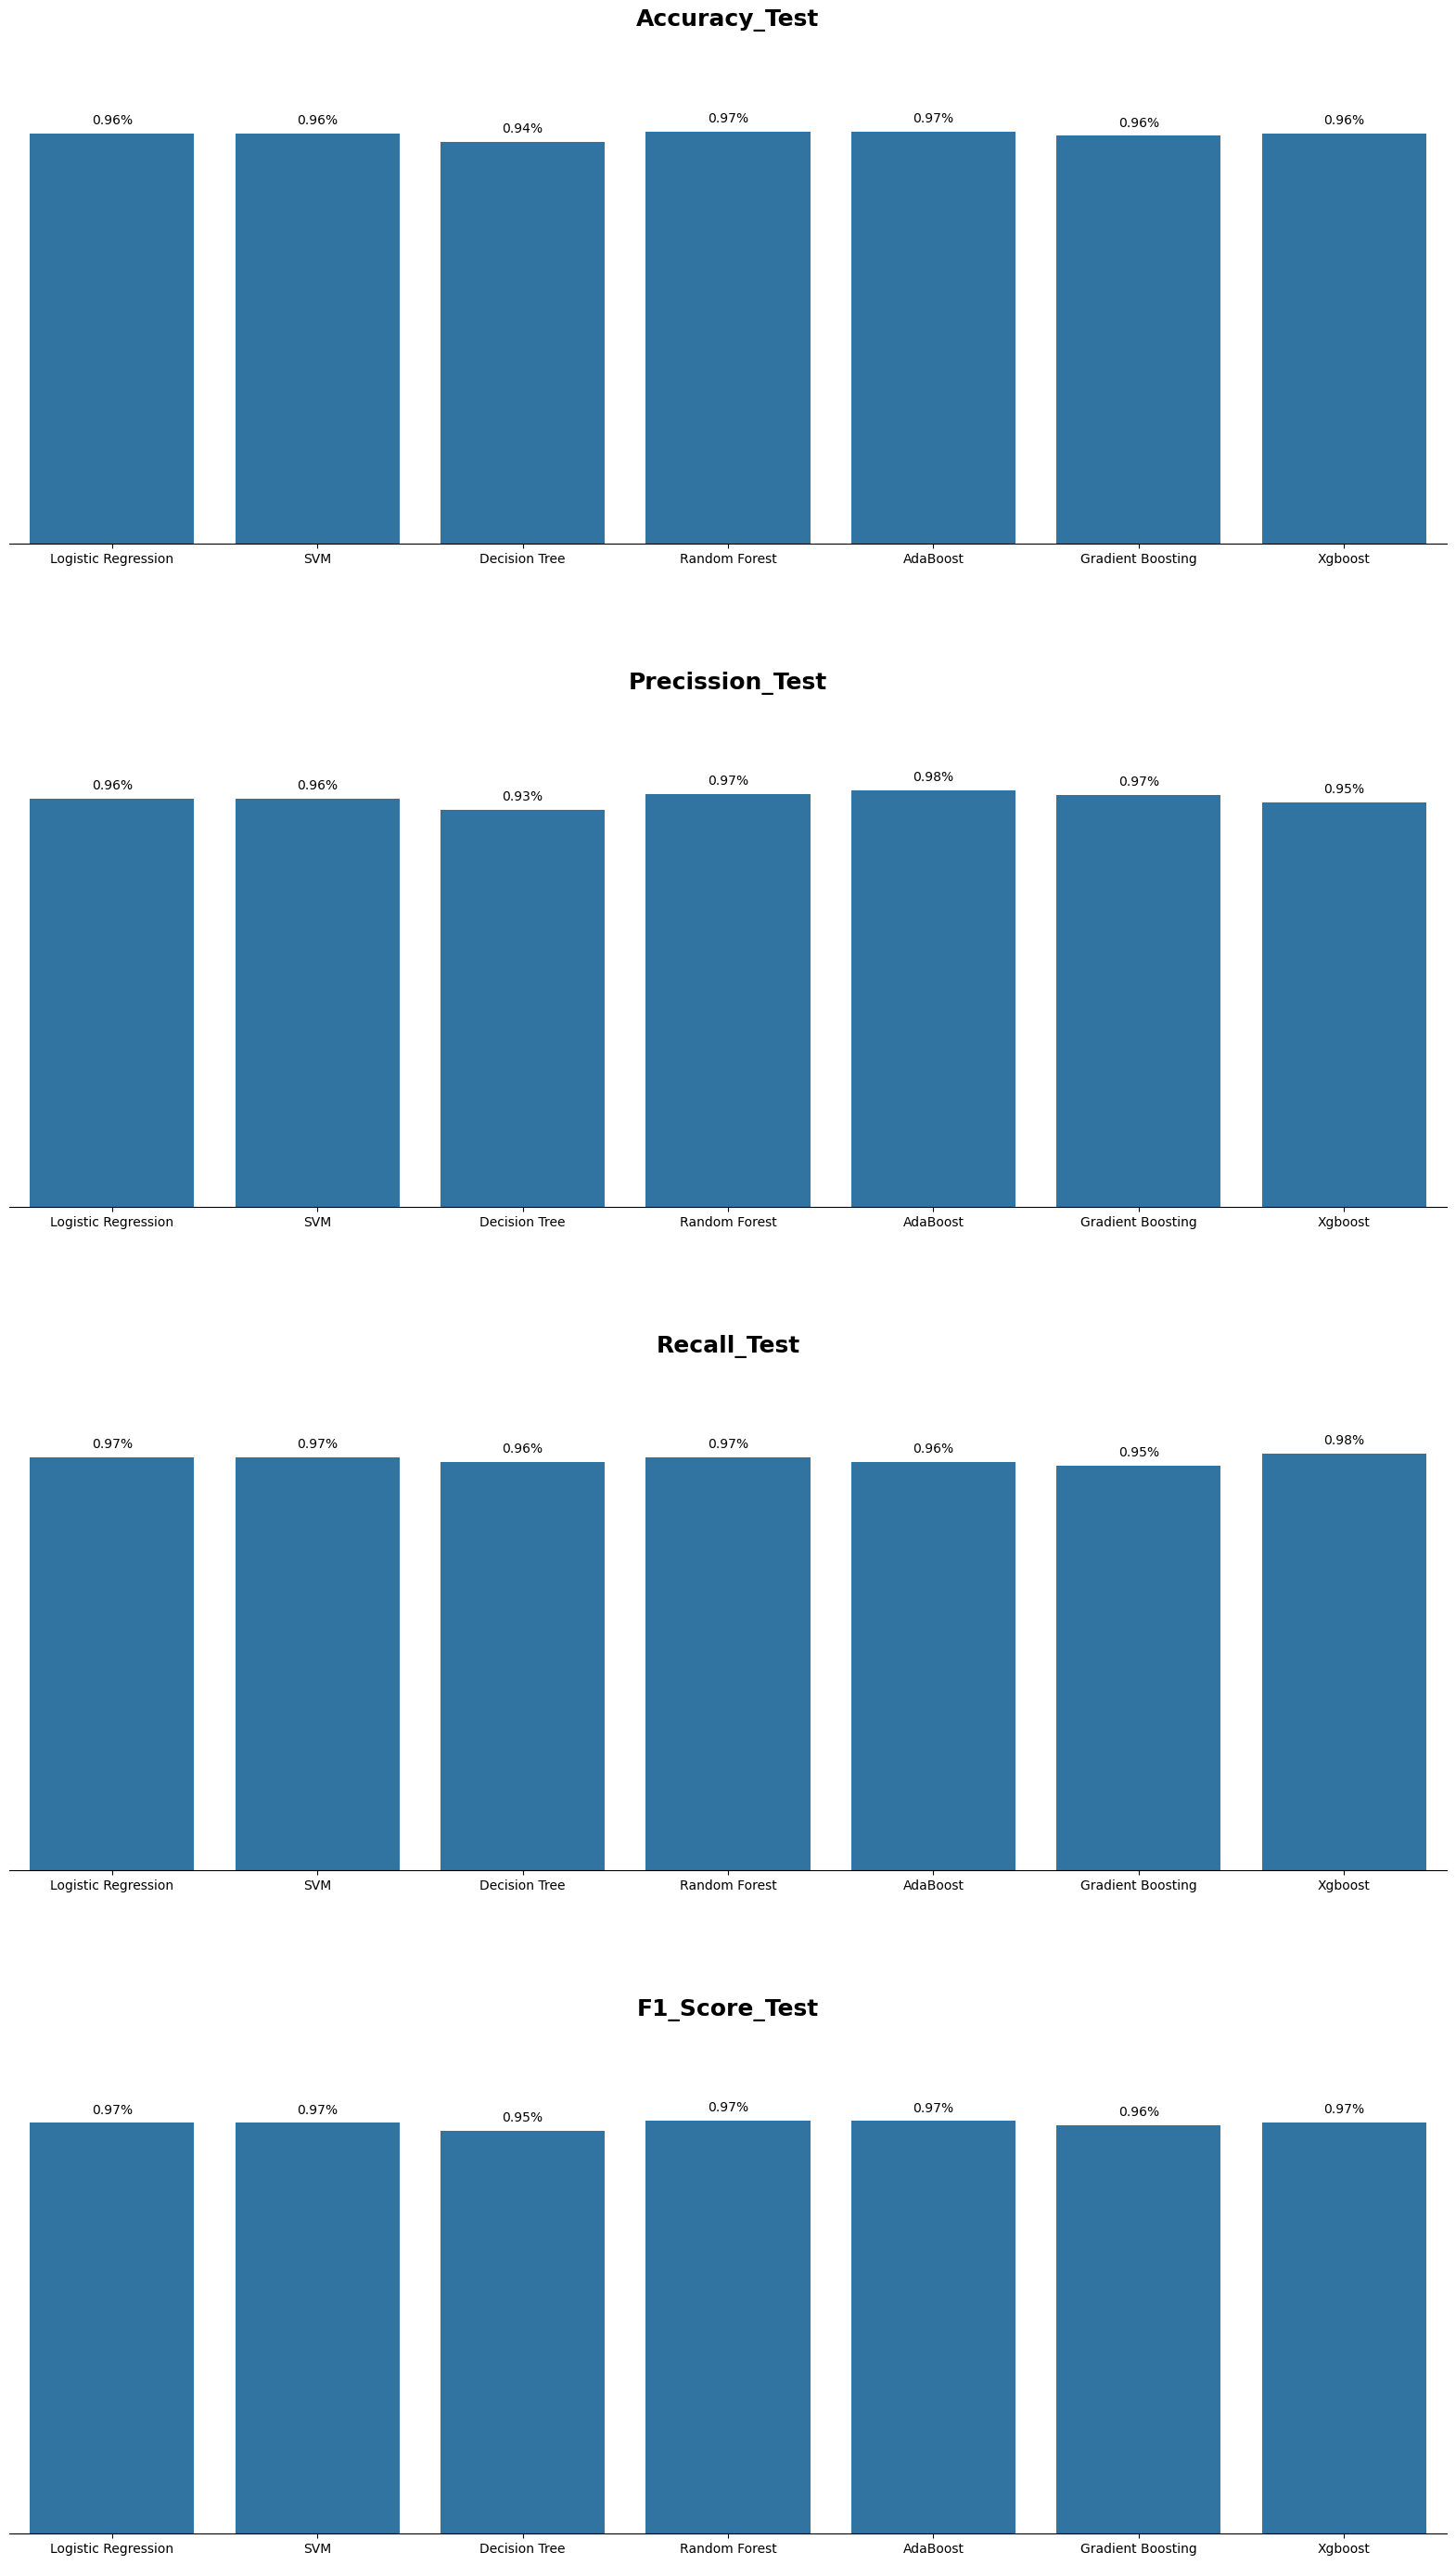

In [51]:
data_result_norm_vis = data_result_norm[['Nama Model', 'Accuracy_Test', 'Precission_Test', 'Recall_Test', 'F1_Score_Test']]
data_result_columns = data_result_norm_vis.drop(columns=['Nama Model']).columns

plt.figure(figsize=(20,35))
for vis_result in range(0, len(data_result_columns)):
    plt.subplot(4, 1, vis_result+1)
    plt.grid(visible=False)
    plt.subplots_adjust(hspace=0.3)
    vis1 = sns.barplot(data=data_result_norm_vis, x=data_result_norm_vis.columns[0], y=data_result_columns[vis_result])
    sns.despine(left=True)
    plt.title(data_result_columns[vis_result], weight='bold', fontsize=18)
    plt.xlabel("")
    plt.yticks([])
    plt.ylabel("")
    plt.ylim(0, 1.2)
    show_value_plot(vis1)

plt.show()

### Train Dengan Model Final

In [52]:
#Train with KNN Models (Final Model)
model_final = RandomForestClassifier()
model_final.fit(x_train_norm, y_train)

#Evaluation model final with confution matrix
TP_final, FN_final, FP_final, TN_final = evaluation_cm(model_final, x_test_norm, y_test)

## **Simulation Bisnis**

In [53]:
dff = y_test.value_counts().reset_index()
dff_pivot = dff.pivot_table(index=None, columns='index', values='Label', fill_value=0)
dff_pivot = dff_pivot.rename(columns={0 : 'No', 1 : 'Yes'})
dff_pivot['No'] = dff_pivot['No'].astype(int)
dff_pivot['Yes'] = dff_pivot['Yes'].astype(int)
dff_pivot

index,No,Yes
Label,103,96


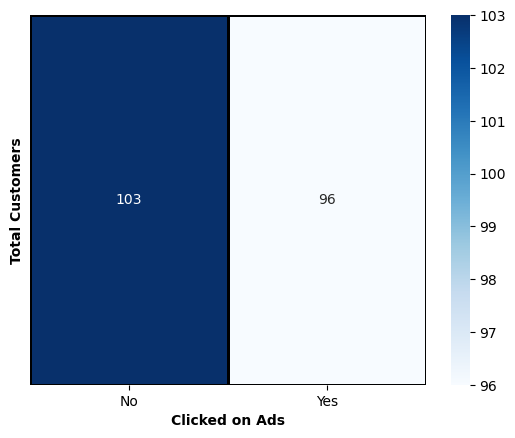

In [55]:
sns.heatmap(dff_pivot, cmap='Blues', annot=True, linewidths=2, fmt='d', linecolor='black')
plt.yticks([])
plt.ylabel("Total Customers", weight='bold')
plt.xlabel("Clicked on Ads", weight='bold')
plt.show()

Visualisasi Heatmap diatas merupakan gambaran dimana **company melakukan sebuah iklan (Ads) tanpa menggunakan machine learning models**. dari **199 customers** yang mendapatkan konten iklan hanya sebanyak **96 customers** yang tertarik dan melakukan click pada iklan yang diberikan. 

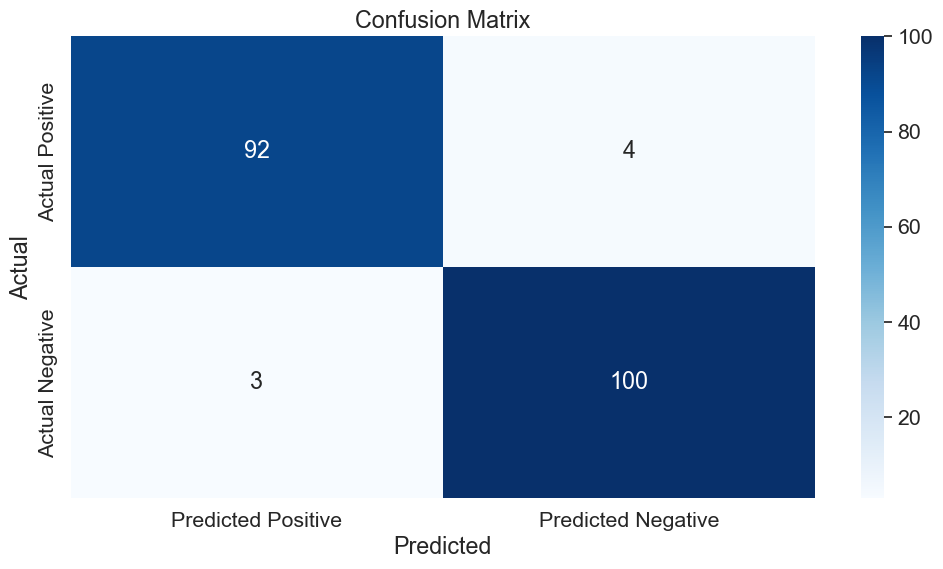

In [51]:
#Simulation With Machine Learning Models
plt.figure(figsize=(12, 6))
sns.set(font_scale=1.4) # Atur skala font untuk visualisasi yang lebih baik
sns.heatmap([[TN_final, FP_final], [FN_final, TP_final]], annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Predicted Positive', 'Predicted Negative'], 
            yticklabels=['Actual Positive', 'Actual Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Kesimpulan :**

Visualisasi Heatmap diatas merupakan **hasil dari penggunaan model machine learning** apabila diterapkan pada **Ads (prediksi customers click Ads)**. dari **199 Customers** yang akan ditawarkan Ads, **model** mampu **memprediksi dengan benar** sebanyak **92 customers** yang akan **melakukan click Ads**, dan **model** juga mampu **memprediksi dengan benar** sebanyak **98 customers** yang **tidak akan melakukan click Ads**. 

In [56]:
#Take Feature Importances
feature_importance = model_final.feature_importances_

#Take a columns name
feature_name = x_train_norm.columns

#Sorted index Columns Name
feature_sort = feature_importance.argsort()[::-1]
feature_importance_sort = feature_importance[feature_sort]
feature_name_sort = feature_name[feature_sort]

#Make DataFrame for Plot Feature Importances
val_importance = pd.DataFrame(feature_importance_sort, columns=['value_importances'])
name_feature = pd.DataFrame(feature_name_sort, columns=['Feature'])
df_feature_importances = pd.concat([name_feature, val_importance], axis=1)
df_feature_importances.head()

,Feature,value_importances
0,Daily Internet Usage,0.447243
1,Daily Time Spent on Site,0.371460
2,Area Income,0.102872
3,Age,0.078425


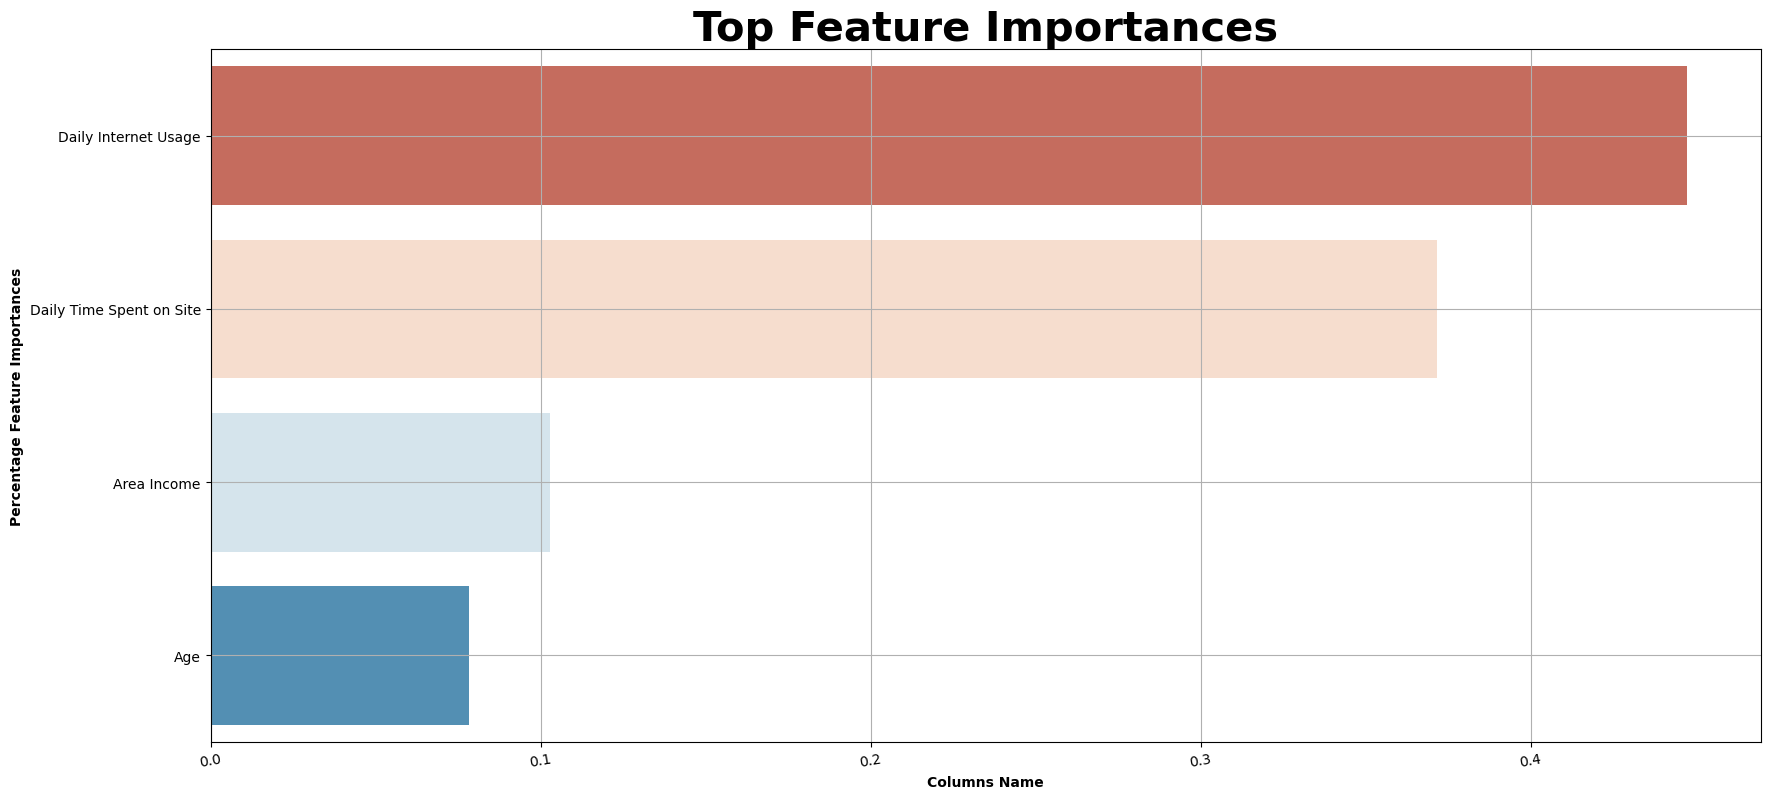

In [57]:
plt.figure(figsize=(20,9))
sns.barplot(df_feature_importances, y='Feature', x='value_importances', palette='RdBu')
plt.title("Top Feature Importances", weight='bold', fontsize=30)
plt.xlabel("Columns Name", weight='bold')
plt.ylabel("Percentage Feature Importances", weight='bold')
plt.xticks(rotation=10)
plt.grid(None)

plt.show()

Dari hasil prediksi models machine learning yang dibuat, terdapat urutan suatu feature yang dianggap paling penting atau paling berpengaruh terhadap presentase customers melakukan click ads, feature tersebut yakni : <br>
1. Daily Internet Usage
2. Daily Time Spent on Site
3. Area Income
4. Age

## **Saved Models**

In [54]:
import pickle

file_name = "Models_ads.sav"
pickle.dump(model_final, open(file_name, 'wb'))